# [0] Please read !
### 원본파일과 내용은 차이가 없으나, 다른 환경에서 사용시 빠른 데이터 load를 위해 path를 지정해주세요. 해당 path에 첨부파일에 포함된 data -> python_colab_data를 그대로 올리고 수행해주세요 :) 바로 아래 코드에 작성해주시면 됩니다!

In [ ]:
#path = 여기에 path를 작성해주세요

In [ ]:
# 한글 폰트 설치 및 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [ ]:
# 데이터 분석 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
sns.set_theme(style="whitegrid")
from matplotlib import pyplot as plt
%matplotlib inline

# GIS 라이브러리
import folium
import json

# 한글 폰트 실행
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# [1] 공원별 위치

## data load
- 출처 : 구글맵에서 제공하는 각 공원별 중심 좌표

<br/>


- 설명 : 서울시에 위치한 한강공원 gis 시각화


In [ ]:
import folium
import json

In [ ]:
park_loc_df = pd.read_csv('path/python_colab_data/한강공원_좌표계.csv', encoding = 'cp949')
park_loc_df

,구분,lat,long,최인근지하철역,거리(sub_KM)
0,강서한강공원,37.588085,126.815235,방화,2.200
1,반포한강공원,37.510623,126.995963,고속버스터미널,1.300
2,광나루한강공원,37.548786,127.120038,암사,0.738
3,난지한강공원,37.566015,126.876518,월드컵경기장,2.100
4,뚝섬한강공원,37.529351,127.069956,망원,1.500
5,망원한강공원,37.555360,126.894914,당산,0.500
6,양화한강공원,37.538300,126.902265,여의나루,0.250
7,여의도한강공원,37.528430,126.933078,여의나루,0.250
8,이촌한강공원,37.516920,126.971702,이촌,1.300
9,잠원한강공원,37.520686,127.012272,신사,1.100


In [ ]:
seoul_area_json = 'path/python_colab_data/seoul_sgg.geojson'
seoul_area = json.load(open(seoul_area_json))

In [ ]:
# 기본 지도
park_map = folium.Map(
    location = [37.5518911,126.9917937] # 지도의 중심점 -> 구글 맵에서 추출 (위도, 경도)
    , tiles = 'CartoDB positron' # 베이스는 어둡게 표기 => 서울만 강조 효과
    , zoom_start = 11
)

# 행정구 표현
folium.Choropleth(
    geo_data = seoul_area,
    fill_opacity = 0.1,
    fill_color = 'white'
).add_to(park_map)

# 한강공원
for idx in park_loc_df.index:
    lat = park_loc_df.loc[idx, 'lat']
    long = park_loc_df.loc[idx, 'long']
    folium.CircleMarker(
        # 위치
        location = [lat, long]
        ,fill    = True
        ,fill_opacity = 0.7
        ,color   = 'white' # 경계선
        ,fill_color = 'blue'
        ,weight  = 1
        ,radius = 7
        ,popup = folium.Popup(park_loc_df.구분[idx])
    ).add_to(park_map)

park_map

# [2] 공원별 CCTV 현황

- 출처 : https://data.seoul.go.kr/dataList/OA-20923/S/1/datasetView.do
- 원데이터명 : 서울시 안심이 CCTV 연계 현황

<br/>


- 설명 : 서울시 전체에 설치된 안심이 cctv 현황

<br/>

- 전처리
    * 위치정보(위도, 경도)로 태블로 맵에 투영,
    * 각 한강공원(좌표) 중심 1KM 반경 버퍼(원) 생성
    * 각 버퍼 내부에 위치한 cctv 갯수 추출

## 데이터 로드

In [ ]:
# data load
cctv_gu_df = pd.read_csv('path/python_colab_data/CCTV/서울시 안심이 CCTV 연계 현황.csv', encoding='cp949')
cctv_gu_df.head(2)

,자치구,안심 주소,위도,경도,CCTV 수량,수정 일시
0,중랑구,중화2동 302-18(고정3)_C-JH02-0009-C,37.5985,127.0786,1,2022-12-01
1,중랑구,망우본동 204-2(고정1)_C-MU01-0040-A,37.6023,127.1036,1,2022-12-01


In [ ]:
cctv_park_df = pd.read_csv('path/python_colab_data/CCTV/공원별_cctv갯수.csv', encoding='cp949')
cctv_park_df

,park,cctv_1km_count,gu
0,강서,24,강서구
1,난지,0,마포구
2,망원,148,마포구
3,양화,146,영등포구
4,여의도,27,영등포구
5,이촌,64,용산구
6,반포,169,서초구
7,잠원,360,서초구
8,뚝섬,486,광진구
9,광나루,368,강동구


## 전처리

In [ ]:
# 자치구별 cctv 갯수

gu_cctv = cctv_gu_df.groupby(['자치구']).count()[['CCTV 수량']]
gu_cctv.head()

,CCTV 수량
자치구,
강남구,7007
강동구,3191
강북구,2858
강서구,3210
관악구,5366


In [ ]:
cctv_df = pd.merge(cctv_park_df,gu_cctv,how = 'left', left_on = 'gu', right_on = '자치구')
cctv_df['cctv_ratio'] = cctv_df['cctv_1km_count'] / cctv_df['CCTV 수량'] * 100
cctv_df

,park,cctv_1km_count,gu,CCTV 수량,cctv_ratio
0,강서,24,강서구,3210,0.747664
1,난지,0,마포구,2450,0.000000
2,망원,148,마포구,2450,6.040816
3,양화,146,영등포구,2899,5.036219
4,여의도,27,영등포구,2899,0.931356
5,이촌,64,용산구,1078,5.936920
6,반포,169,서초구,5060,3.339921
7,잠원,360,서초구,5060,7.114625
8,뚝섬,486,광진구,4091,11.879736
9,광나루,368,강동구,3191,11.532435


## 시각화

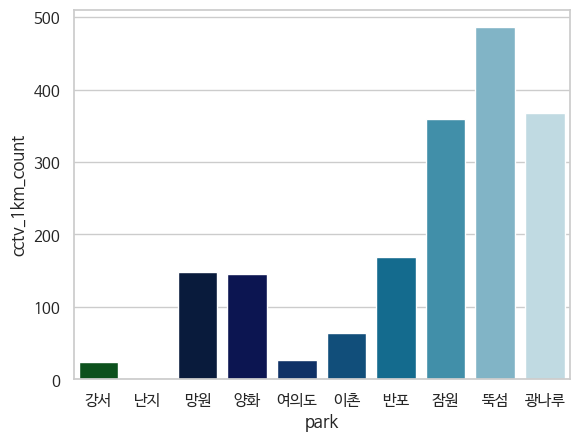

In [ ]:
sns.barplot(data = cctv_df, x = 'park', y = 'cctv_1km_count', palette='ocean')
plt.show()

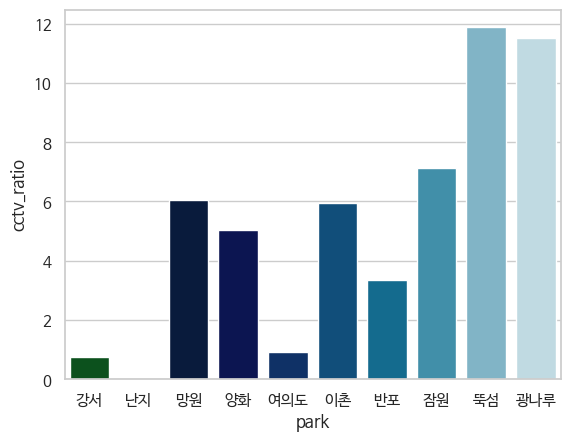

In [ ]:
sns.barplot(data = cctv_df, x = 'park', y = 'cctv_ratio', palette='ocean')
plt.show()

# [3] 평균 체류시간

- 출처 : https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do
- 원데이터명 : 관광지별 분석 - 평균 체류시간 (통신 데이터 기반)

<br/>


- 설명 : 통신 데이터 기반 각 공원별 방문자 평균 체류시간 분석 (양화 공원 제외)
<br/>

- 전처리
    * 각 공원별 체류시간 웹에서 직접 수집

<br/>

(+) 태블로에서 분석한 자료와 결합해보았을 때, 평균체류시간이 긴 이촌, 망원, 광나루는 운동 목적의 방문객 비율이 다른 한강공원에 비해 높았음
(+) 평균 체류시간이 긴 이촌,망원,광나루 지역은 운동시설이 다수 분포되어 있으며 길게 뻗어있는 모양을 하고 있다는 점이 공통점 -> 산책 및 운동에 특화!

## 데이터 로드

In [ ]:
visitor_df = pd.read_csv('path/python_colab_data/관광데이터/visitor_loc_by_park.csv', encoding = 'cp949')
visitor_df.head(2)

,구분,평균체류시간,visitor_from_seoul_2201,visitor_from_gg_2201,visitor_from_ic_2201,visitor_from_etc_2201,visitor_from_seoul_2202,visitor_from_gg_2202,visitor_from_ic_2202,visitor_from_etc_2202,...,visitor_from_ic_2305,visitor_from_etc_2305,visitor_from_seoul_2306,visitor_from_gg_2306,visitor_from_ic_2306,visitor_from_etc_2306,visitor_from_seoul_2307,visitor_from_gg_2307,visitor_from_ic_2307,visitor_from_etc_2307
0,강서,50.0,30.7,49.9,14.1,5.3,35.2,48.1,13.4,3.3,...,14.4,5.0,34.4,46.1,15.7,3.8,33.9,45.8,15.6,4.7
1,반포,45.0,59.3,29.0,4.1,7.6,60.8,28.2,3.9,7.1,...,4.8,8.0,56.0,30.6,4.5,8.9,56.5,29.9,4.5,9.1


## 시각화

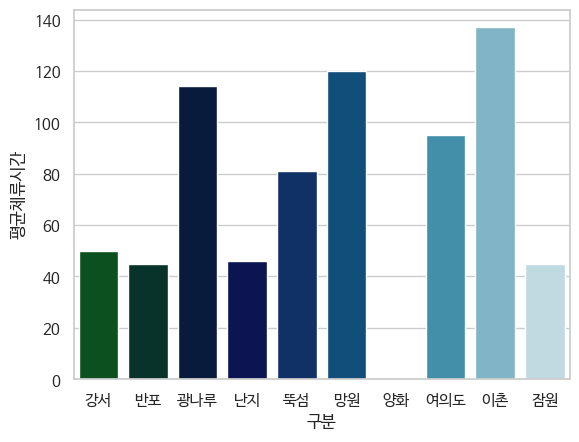

In [ ]:
sns.barplot(data = visitor_df, x = '구분', y = '평균체류시간', palette='ocean')
plt.show()

# [4] 방문객 출신 지역 분석

- 출처 : https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do
- 원데이터명 : 관광지별 분석 - 방문객 출신 지역 (통신 데이터 기반)

<br/>


- 설명 : 통신 데이터 기반 각 공원별 방문자 출신 지역 분석 (양화 공원 제외)
<br/>

- 전처리
    * 각 공원별 출신지역 웹에서 직접 수집 및 전처리

## 데이터 로드

In [ ]:
visit_loc_df =  pd.read_csv('path/python_colab_data/관광데이터/visitor_loc_by_park.csv', encoding = 'cp949')
visit_loc_df.head(2)

,구분,평균체류시간,visitor_from_seoul_2201,visitor_from_gg_2201,visitor_from_ic_2201,visitor_from_etc_2201,visitor_from_seoul_2202,visitor_from_gg_2202,visitor_from_ic_2202,visitor_from_etc_2202,...,visitor_from_ic_2305,visitor_from_etc_2305,visitor_from_seoul_2306,visitor_from_gg_2306,visitor_from_ic_2306,visitor_from_etc_2306,visitor_from_seoul_2307,visitor_from_gg_2307,visitor_from_ic_2307,visitor_from_etc_2307
0,강서,50.0,30.7,49.9,14.1,5.3,35.2,48.1,13.4,3.3,...,14.4,5.0,34.4,46.1,15.7,3.8,33.9,45.8,15.6,4.7
1,반포,45.0,59.3,29.0,4.1,7.6,60.8,28.2,3.9,7.1,...,4.8,8.0,56.0,30.6,4.5,8.9,56.5,29.9,4.5,9.1


## 전처리

- 봄,여름,가을,겨울별 df 생성, 계산

In [ ]:
# 봄 : 3,4,5월
spring_visit_loc_df = visit_loc_df[['visitor_from_seoul_2203','visitor_from_gg_2203','visitor_from_ic_2203', 'visitor_from_etc_2203',
                                   'visitor_from_seoul_2204','visitor_from_gg_2204','visitor_from_ic_2204', 'visitor_from_etc_2204',
                                   'visitor_from_seoul_2205','visitor_from_gg_2205','visitor_from_ic_2205', 'visitor_from_etc_2205',
                                   'visitor_from_seoul_2303','visitor_from_gg_2303','visitor_from_ic_2303', 'visitor_from_etc_2303',
                                   'visitor_from_seoul_2304','visitor_from_gg_2304','visitor_from_ic_2304', 'visitor_from_etc_2304',
                                   'visitor_from_seoul_2305','visitor_from_gg_2305','visitor_from_ic_2305', 'visitor_from_etc_2305','구분']]

summer_visit_loc_df = visit_loc_df[['visitor_from_seoul_2206','visitor_from_gg_2206','visitor_from_ic_2206', 'visitor_from_etc_2206',
                                   'visitor_from_seoul_2207','visitor_from_gg_2207','visitor_from_ic_2207', 'visitor_from_etc_2207',
                                   'visitor_from_seoul_2208','visitor_from_gg_2208','visitor_from_ic_2208', 'visitor_from_etc_2208',
                                   'visitor_from_seoul_2306','visitor_from_gg_2306','visitor_from_ic_2306', 'visitor_from_etc_2306',
                                   'visitor_from_seoul_2307','visitor_from_gg_2307','visitor_from_ic_2307', 'visitor_from_etc_2307','구분']]

fall_visit_loc_df = visit_loc_df[['visitor_from_seoul_2209','visitor_from_gg_2209','visitor_from_ic_2209', 'visitor_from_etc_2209',
                                'visitor_from_seoul_2210','visitor_from_gg_2210','visitor_from_ic_2210', 'visitor_from_etc_2210',
                                'visitor_from_seoul_2211','visitor_from_gg_2211','visitor_from_ic_2211', 'visitor_from_etc_2211','구분']]

winter_visit_loc_df = visit_loc_df[['visitor_from_seoul_2212','visitor_from_gg_2212','visitor_from_ic_2212', 'visitor_from_etc_2212',
                                    'visitor_from_seoul_2201','visitor_from_gg_2201','visitor_from_ic_2201', 'visitor_from_etc_2201',
                                    'visitor_from_seoul_2202','visitor_from_gg_2202','visitor_from_ic_2202', 'visitor_from_etc_2202',
                                    'visitor_from_seoul_2301','visitor_from_gg_2301','visitor_from_ic_2301', 'visitor_from_etc_2301',
                                    'visitor_from_seoul_2302','visitor_from_gg_2302','visitor_from_ic_2302', 'visitor_from_etc_2302','구분']]

In [ ]:
spring_visit_loc_df['mean_spring_seoul'] = (spring_visit_loc_df['visitor_from_seoul_2203'] + spring_visit_loc_df['visitor_from_seoul_2204'] + spring_visit_loc_df['visitor_from_seoul_2205'] + spring_visit_loc_df['visitor_from_seoul_2303'] + spring_visit_loc_df['visitor_from_seoul_2304'] + spring_visit_loc_df['visitor_from_seoul_2305'])/6
spring_visit_loc_df['mean_spring_gg'] = (spring_visit_loc_df['visitor_from_gg_2203'] + spring_visit_loc_df['visitor_from_gg_2204'] + spring_visit_loc_df['visitor_from_gg_2205'] + spring_visit_loc_df['visitor_from_gg_2303'] + spring_visit_loc_df['visitor_from_gg_2304'] + spring_visit_loc_df['visitor_from_gg_2305'])/6
spring_visit_loc_df['mean_spring_ic'] = (spring_visit_loc_df['visitor_from_ic_2203'] + spring_visit_loc_df['visitor_from_ic_2204'] + spring_visit_loc_df['visitor_from_ic_2205'] + spring_visit_loc_df['visitor_from_ic_2303'] + spring_visit_loc_df['visitor_from_ic_2304'] + spring_visit_loc_df['visitor_from_ic_2305'])/6
spring_visit_loc_df['mean_spring_etc'] = (spring_visit_loc_df['visitor_from_etc_2203'] + spring_visit_loc_df['visitor_from_etc_2204'] + spring_visit_loc_df['visitor_from_etc_2205'] + spring_visit_loc_df['visitor_from_etc_2303'] + spring_visit_loc_df['visitor_from_etc_2304'] + spring_visit_loc_df['visitor_from_etc_2305'])/6
spring_visit_mean = spring_visit_loc_df[['구분','mean_spring_seoul','mean_spring_gg','mean_spring_ic','mean_spring_etc']]

In [ ]:
summer_visit_loc_df['mean_summer_seoul'] = (summer_visit_loc_df['visitor_from_seoul_2206'] + summer_visit_loc_df['visitor_from_seoul_2207'] + summer_visit_loc_df['visitor_from_seoul_2208'] + summer_visit_loc_df['visitor_from_seoul_2306'] + summer_visit_loc_df['visitor_from_seoul_2307'] )/5
summer_visit_loc_df['mean_summer_gg'] = (summer_visit_loc_df['visitor_from_gg_2206'] + summer_visit_loc_df['visitor_from_gg_2207'] + summer_visit_loc_df['visitor_from_gg_2208'] + summer_visit_loc_df['visitor_from_gg_2306'] + summer_visit_loc_df['visitor_from_gg_2307'] )/5
summer_visit_loc_df['mean_summer_ic'] = (summer_visit_loc_df['visitor_from_ic_2206'] + summer_visit_loc_df['visitor_from_ic_2207'] + summer_visit_loc_df['visitor_from_ic_2208'] + summer_visit_loc_df['visitor_from_ic_2306'] + summer_visit_loc_df['visitor_from_ic_2307'] )/5
summer_visit_loc_df['mean_summer_etc'] = (summer_visit_loc_df['visitor_from_etc_2206'] + summer_visit_loc_df['visitor_from_etc_2207'] + summer_visit_loc_df['visitor_from_etc_2208'] + summer_visit_loc_df['visitor_from_etc_2306'] + summer_visit_loc_df['visitor_from_etc_2307'] )/5
summer_visit_mean = summer_visit_loc_df[['구분','mean_summer_seoul','mean_summer_gg','mean_summer_ic','mean_summer_etc']]

In [ ]:
fall_visit_loc_df['mean_fall_seoul'] = (fall_visit_loc_df['visitor_from_seoul_2209'] + fall_visit_loc_df['visitor_from_seoul_2210'] + fall_visit_loc_df['visitor_from_seoul_2211']  )/3
fall_visit_loc_df['mean_fall_gg'] = (fall_visit_loc_df['visitor_from_gg_2209'] + fall_visit_loc_df['visitor_from_gg_2210'] + fall_visit_loc_df['visitor_from_gg_2211']  )/3
fall_visit_loc_df['mean_fall_ic'] = (fall_visit_loc_df['visitor_from_ic_2209'] + fall_visit_loc_df['visitor_from_ic_2210'] + fall_visit_loc_df['visitor_from_ic_2211']  )/3
fall_visit_loc_df['mean_fall_etc'] = (fall_visit_loc_df['visitor_from_etc_2209'] + fall_visit_loc_df['visitor_from_etc_2210'] + fall_visit_loc_df['visitor_from_etc_2211']  )/3
fall_visit_mean = fall_visit_loc_df[['구분','mean_fall_seoul','mean_fall_gg','mean_fall_ic','mean_fall_etc']]

In [ ]:
winter_visit_loc_df['mean_winter_seoul'] = (winter_visit_loc_df['visitor_from_seoul_2212'] + winter_visit_loc_df['visitor_from_seoul_2201'] + winter_visit_loc_df['visitor_from_seoul_2202'] + winter_visit_loc_df['visitor_from_seoul_2301'] + winter_visit_loc_df['visitor_from_seoul_2302']  )/5
winter_visit_loc_df['mean_winter_gg'] = (winter_visit_loc_df['visitor_from_gg_2212'] + winter_visit_loc_df['visitor_from_gg_2201'] + winter_visit_loc_df['visitor_from_gg_2202'] + winter_visit_loc_df['visitor_from_gg_2301'] + winter_visit_loc_df['visitor_from_gg_2302']  )/5
winter_visit_loc_df['mean_winter_ic'] = (winter_visit_loc_df['visitor_from_ic_2212'] + winter_visit_loc_df['visitor_from_ic_2201'] + winter_visit_loc_df['visitor_from_ic_2202'] + winter_visit_loc_df['visitor_from_ic_2301'] + winter_visit_loc_df['visitor_from_ic_2302']  )/5
winter_visit_loc_df['mean_winter_etc'] = (winter_visit_loc_df['visitor_from_etc_2212'] + winter_visit_loc_df['visitor_from_etc_2201'] + winter_visit_loc_df['visitor_from_etc_2202'] + winter_visit_loc_df['visitor_from_etc_2301'] + winter_visit_loc_df['visitor_from_etc_2302'])/5
winter_visit_mean = winter_visit_loc_df[['구분','mean_winter_seoul','mean_winter_gg','mean_winter_ic','mean_winter_etc']]

In [ ]:
visit_loc_df['seoul_total'] = (spring_visit_mean['mean_spring_seoul'] + summer_visit_mean['mean_summer_seoul'] + fall_visit_mean['mean_fall_seoul'] + winter_visit_mean['mean_winter_seoul'])/4
visit_loc_df['gg_total'] = (spring_visit_mean['mean_spring_gg'] + summer_visit_mean['mean_summer_gg'] + fall_visit_mean['mean_fall_gg'] + winter_visit_mean['mean_winter_gg'])/4
visit_loc_df['ic_total'] = (spring_visit_mean['mean_spring_ic'] + summer_visit_mean['mean_summer_ic'] + fall_visit_mean['mean_fall_ic'] + winter_visit_mean['mean_winter_ic'])/4
visit_loc_df['etc_total'] = (spring_visit_mean['mean_spring_etc'] + summer_visit_mean['mean_summer_etc'] + fall_visit_mean['mean_fall_etc'] + winter_visit_mean['mean_winter_etc'])/4

## 시각화
- 각 지역별 방문객 (봄)
- 각 지역별 방문객 (여름)
- 각 지역별 방문객 (가을)
- 각 지역별 방문객 (겨울)
- 각 지역별 방문객 (통합)


</br>

## (+) 인사이트
+ 계절별로 살펴봤으나 큰 특이사항 없음. 계절 상관없이 통합하여 보는것이 오히려 빠른 이해가 가능할것으로 판단
- 강서한강공원의 서울 방문객이 확연하게 적으며 광나루도 적은편
- 강서한강공원은 서울의 서쪽, 광나루는 동쪽에 위치하여 인접 지역 방문객들의 방문 비율이 높음
- 이촌, 잠원, 반포, 망원은 서울 시민들의 방문 비율이 높은편임

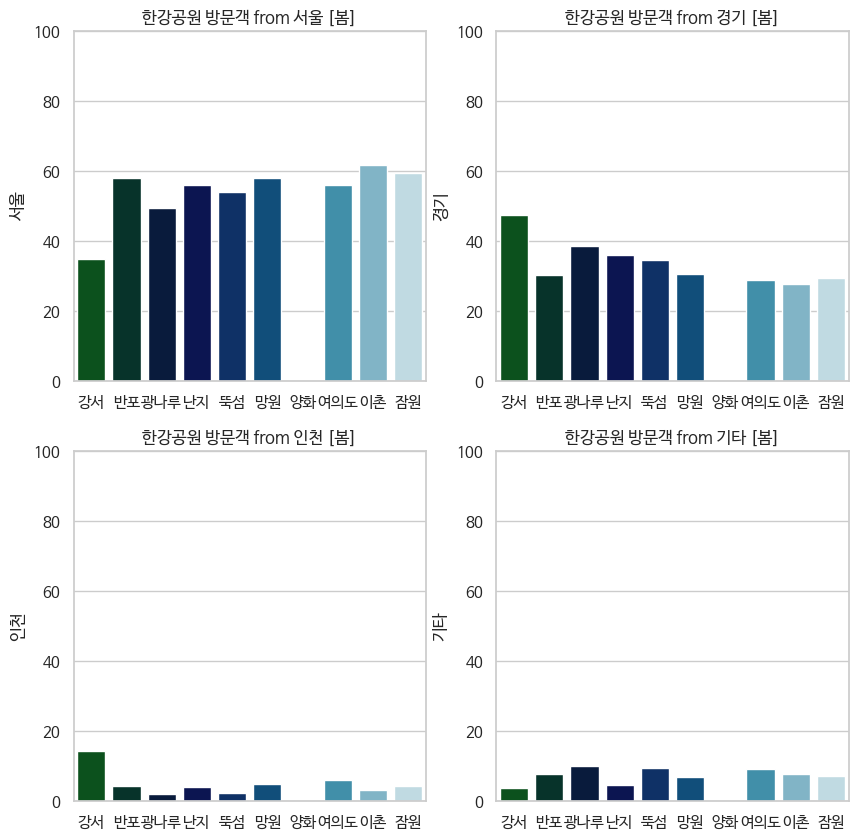

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
sns.barplot(data = spring_visit_mean, x = '구분', y = 'mean_spring_seoul', palette='ocean',ax=ax[0,0]).set(ylim=(0, 100),xlabel="", ylabel="서울")
sns.barplot(data = spring_visit_mean, x = '구분', y = 'mean_spring_gg', palette='ocean',ax=ax[0,1]).set(ylim=(0, 100),xlabel="", ylabel="경기")
sns.barplot(data = spring_visit_mean, x = '구분', y = 'mean_spring_ic', palette='ocean',ax=ax[1,0]).set(ylim=(0, 100),xlabel="", ylabel="인천")
sns.barplot(data = spring_visit_mean, x = '구분', y = 'mean_spring_etc', palette='ocean',ax=ax[1,1]).set(ylim=(0, 100),xlabel="", ylabel="기타")
ax[0, 0].set_title("한강공원 방문객 from 서울 [봄]")
ax[0, 1].set_title("한강공원 방문객 from 경기 [봄]")
ax[1, 0].set_title("한강공원 방문객 from 인천 [봄]")
ax[1, 1].set_title("한강공원 방문객 from 기타 [봄]")
plt.show()

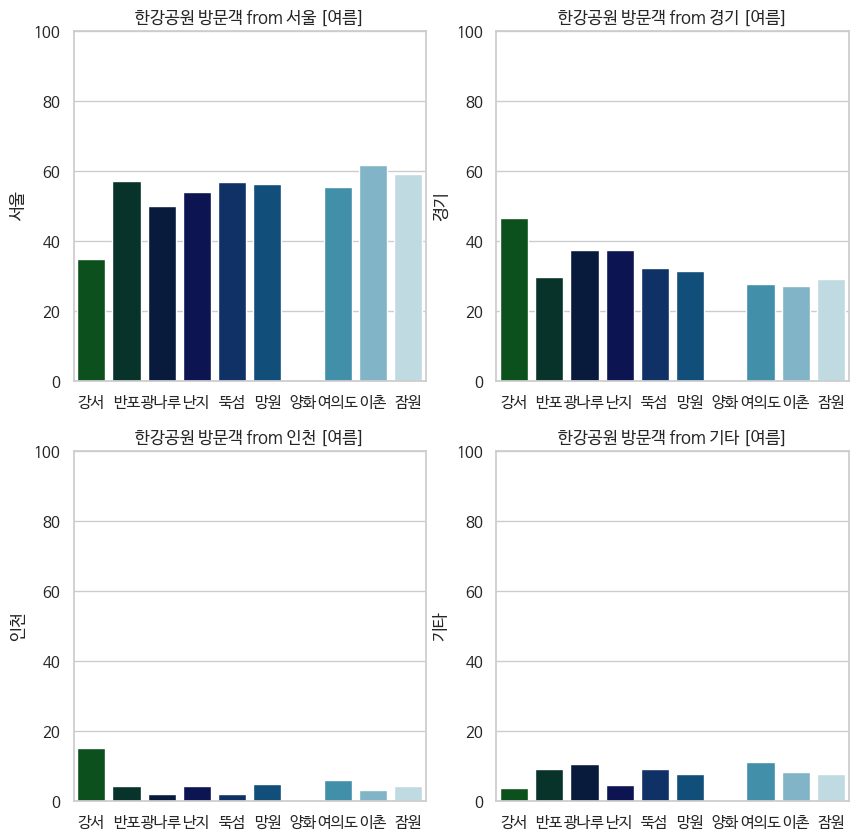

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
sns.barplot(data = summer_visit_mean, x = '구분', y = 'mean_summer_seoul', palette='ocean',ax=ax[0,0]).set(ylim=(0, 100),xlabel="", ylabel="서울")
sns.barplot(data = summer_visit_mean, x = '구분', y = 'mean_summer_gg', palette='ocean',ax=ax[0,1]).set(ylim=(0, 100),xlabel="", ylabel="경기")
sns.barplot(data = summer_visit_mean, x = '구분', y = 'mean_summer_ic', palette='ocean',ax=ax[1,0]).set(ylim=(0, 100),xlabel="", ylabel="인천")
sns.barplot(data = summer_visit_mean, x = '구분', y = 'mean_summer_etc', palette='ocean',ax=ax[1,1]).set(ylim=(0, 100),xlabel="", ylabel="기타")
ax[0, 0].set_title("한강공원 방문객 from 서울 [여름]")
ax[0, 1].set_title("한강공원 방문객 from 경기 [여름]")
ax[1, 0].set_title("한강공원 방문객 from 인천 [여름]")
ax[1, 1].set_title("한강공원 방문객 from 기타 [여름]")
plt.show()

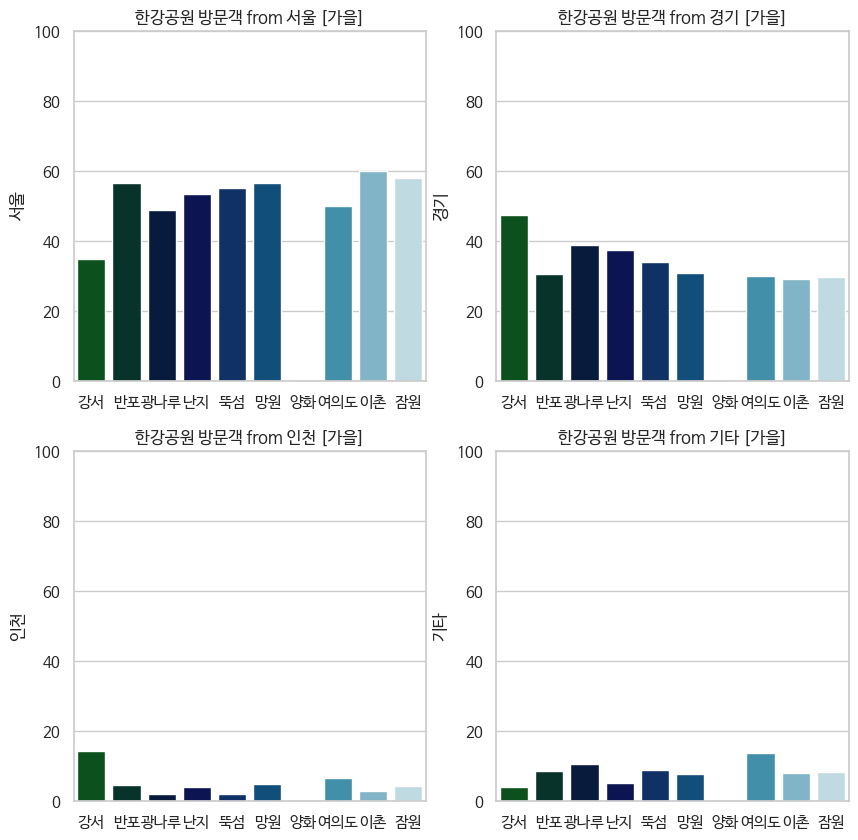

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
sns.barplot(data = fall_visit_mean, x = '구분', y = 'mean_fall_seoul', palette='ocean',ax=ax[0,0]).set(ylim=(0, 100),xlabel="", ylabel="서울")
sns.barplot(data = fall_visit_mean, x = '구분', y = 'mean_fall_gg', palette='ocean',ax=ax[0,1]).set(ylim=(0, 100),xlabel="", ylabel="경기")
sns.barplot(data = fall_visit_mean, x = '구분', y = 'mean_fall_ic', palette='ocean',ax=ax[1,0]).set(ylim=(0, 100),xlabel="", ylabel="인천")
sns.barplot(data = fall_visit_mean, x = '구분', y = 'mean_fall_etc', palette='ocean',ax=ax[1,1]).set(ylim=(0, 100),xlabel="", ylabel="기타")
ax[0, 0].set_title("한강공원 방문객 from 서울 [가을]")
ax[0, 1].set_title("한강공원 방문객 from 경기 [가을]")
ax[1, 0].set_title("한강공원 방문객 from 인천 [가을]")
ax[1, 1].set_title("한강공원 방문객 from 기타 [가을]")
plt.show()

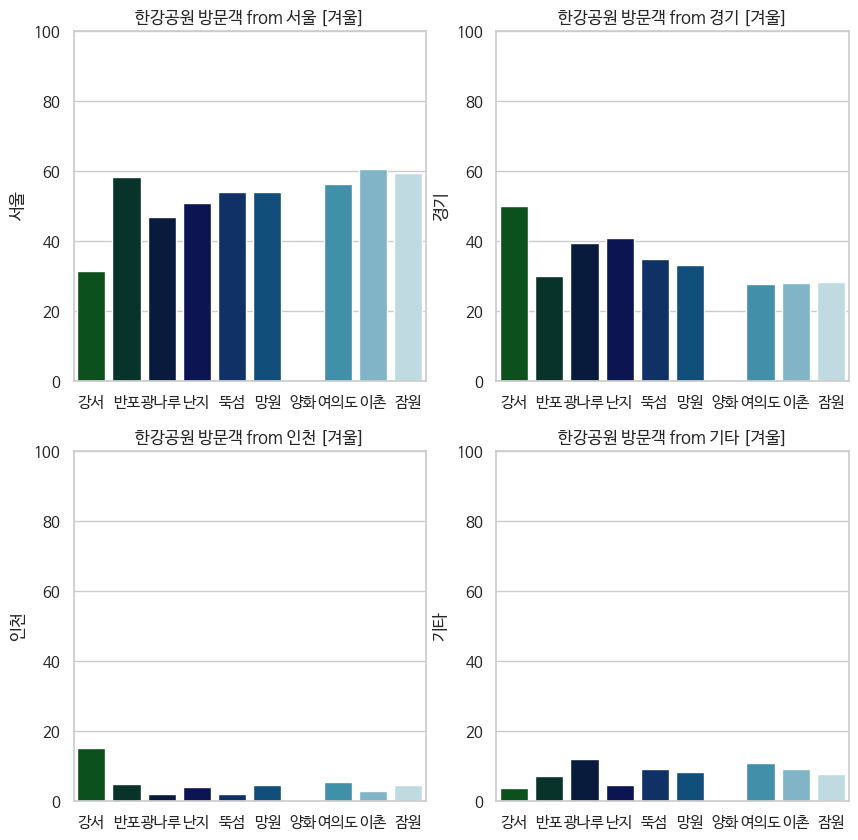

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
sns.barplot(data = winter_visit_mean, x = '구분', y = 'mean_winter_seoul', palette='ocean',ax=ax[0,0]).set(ylim=(0, 100),xlabel="", ylabel="서울")
sns.barplot(data = winter_visit_mean, x = '구분', y = 'mean_winter_gg', palette='ocean',ax=ax[0,1]).set(ylim=(0, 100),xlabel="", ylabel="경기")
sns.barplot(data = winter_visit_mean, x = '구분', y = 'mean_winter_ic', palette='ocean',ax=ax[1,0]).set(ylim=(0, 100),xlabel="", ylabel="인천")
sns.barplot(data = winter_visit_mean, x = '구분', y = 'mean_winter_etc', palette='ocean',ax=ax[1,1]).set(ylim=(0, 100),xlabel="", ylabel="기타")
ax[0, 0].set_title("한강공원 방문객 from 서울 [겨울]")
ax[0, 1].set_title("한강공원 방문객 from 경기 [겨울]")
ax[1, 0].set_title("한강공원 방문객 from 인천 [겨울]")
ax[1, 1].set_title("한강공원 방문객 from 기타 [겨울]")
plt.show()

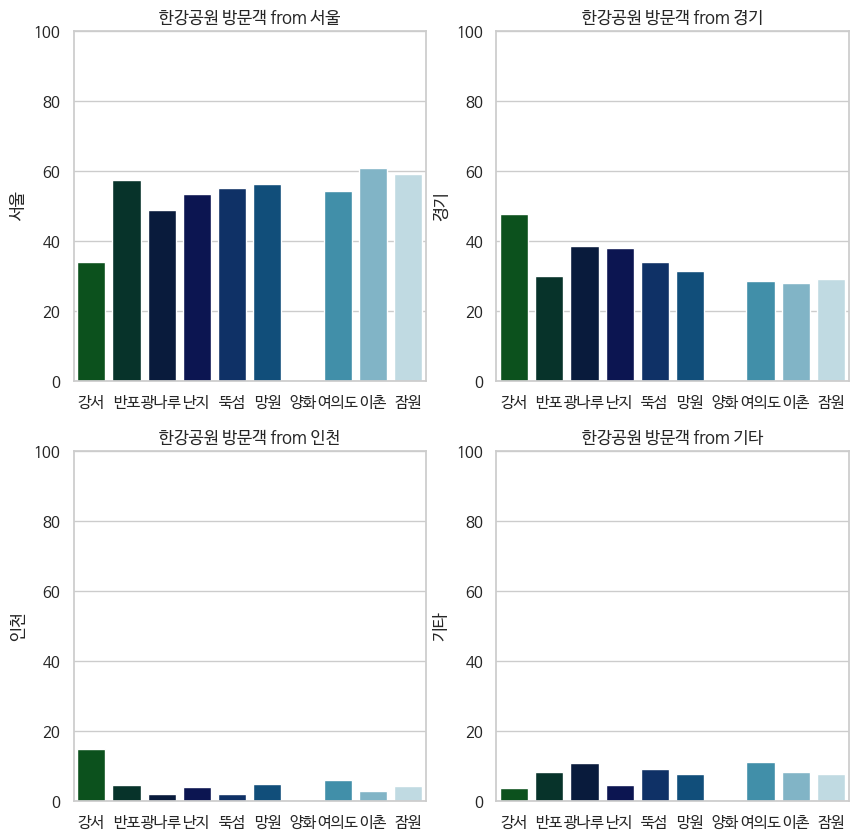

In [ ]:
# 각 지역
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
sns.barplot(data = visit_loc_df, x = '구분', y = 'seoul_total', palette='ocean',ax=ax[0,0]).set(ylim=(0, 100),xlabel="", ylabel="서울")
sns.barplot(data = visit_loc_df, x = '구분', y = 'gg_total', palette='ocean',ax=ax[0,1]).set(ylim=(0, 100),xlabel="", ylabel="경기")
sns.barplot(data = visit_loc_df, x = '구분', y = 'ic_total', palette='ocean',ax=ax[1,0]).set(ylim=(0, 100),xlabel="", ylabel="인천")
sns.barplot(data = visit_loc_df, x = '구분', y = 'etc_total', palette='ocean',ax=ax[1,1]).set(ylim=(0, 100),xlabel="", ylabel="기타")
ax[0, 0].set_title("한강공원 방문객 from 서울")
ax[0, 1].set_title("한강공원 방문객 from 경기")
ax[1, 0].set_title("한강공원 방문객 from 인천")
ax[1, 1].set_title("한강공원 방문객 from 기타")
plt.show()

# [5] 일자별 한강공원별 방문객 수 전처리

- 출처 : https://www.data.go.kr/data/15102637/fileData.do
- 출처 : https://www.data.go.kr/data/15051956/fileData.do?recommendDataYn=Y
- 원데이터명
    - 서울특별시_한강공원 월별 이용객 및 폐기물 배출량 현황
    - 서울특별시_한강공원 이용객 현황

<br/>


- 설명 : 한강공원 방문객 일별 통계 (18 ~ 23년 5월) 일별/유형별/시간대별/날씨
<br/>

- 전처리
    * 공원별로, 월별로 모두 분리되어 있는 데이터로 직접 통합 작업 진행
    * 이후 과정 colab을 통해 추가 전처리
    * 일자별로 분리된 데이터 공원별 통합
    * 태블로 작업을 위한 최종 데이터 추출

## 반포 한강공원

- 22년 2월 ~ 5월, 8월 미측정

In [ ]:
banpo = pd.read_csv('path/python_colab_data/방문객/반포한강공원.csv', encoding = 'cp949')
banpo = banpo.iloc[0:6,:]
banpo.head(2)

,구분,190101,190102,190103,190104,190105,190106,190107,190108,190109,...,230522,230523,230524,230525,230526,230527,230528,230529,230530,230531
0,요일,화,수,목,금,토,일,월,화,수,...,월,화,수,목,금,토,일,월,화,수
1,날씨,맑음,맑음,맑음,맑음,맑음,맑음,맑음,맑음,맑음,...,맑음,맑움,흐림,맑음,맑음,흐리고비옴,비,맑음,맑음,맑음


In [ ]:
# 수월한 전처리를 위해 전치행렬 처
banpo_tmp = banpo.copy().T
banpo_tmp = banpo_tmp.rename(columns=banpo_tmp.iloc[0])
banpo_tmp = banpo_tmp.drop(banpo_tmp.index[0])
banpo_tmp

,요일,날씨,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
190101,화,맑음,284,2080,3794,NaN
190102,수,맑음,0,1750,1115,NaN
190103,목,맑음,0,8550,0,NaN
190104,금,맑음,1095,4757,4452,2247
190105,토,맑음,215,1750,3697,972
...,...,...,...,...,...,...
230527,토,흐리고비옴,1280,1800,1275,820
230528,일,비,30,-,1100,20
230529,월,맑음,3080,9600,19000,3570
230530,화,맑음,1150,12800,32300,1450


In [ ]:
# null값 확인
banpo_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   요일         1612 non-null   object
 1   날씨         1612 non-null   object
 2   일반이용자(아침)  1405 non-null   object
 3   일반이용자(낮)   1457 non-null   object
 4   일반이용자(저녁)  1441 non-null   object
 5   운동시설       1425 non-null   object
dtypes: object(6)
memory usage: 88.2+ KB


In [ ]:
# 날씨 값 전처리
# 맑음, 비, 흐림, 폭염, 한파, 미세먼지, 눈
# 두개 이상 날씨가 포함된 경우 늦은시간 날씨를 적용 (일반적으로 이용객이 많은 오후 시간대 날씨가 더 큰 영향을 줄것이라 판단)
# 단, 눈/비 등 특이기상은 특이기상을 우선 고려

banpo_tmp.replace({'날씨': {'맑음/흐림': '흐림', '맑음/비' : '비', '비/맑음' : '비', '흐림/비' : '비',  '비/흐림':'비', '맑음/폭염':'폭염',
                          '흐리고/비':'비', '맑음/한파':'한파', '흐림/먼지':'미세먼지', '눈/흐림':'눈', '흐림/맑음':'맑음', '맑음,비':'비',
                          '비,맑음':'맑음', '흐림,비':'비', '흐림,맑음':'맑음', '눈,맑음':'눈', '흐림/눈':'눈', '눈/맑음':'눈',
                        '맑음/눈':'눈', ' 맑음':'맑음', ' 맑음 ':'맑음', ' 흐림 ':'흐림', ' 흐림/맑음 ':'맑음', ' 흐림/비 ':'비', ' 맑음/비 ':'비',
                        ' 비/맑음 ':'비', ' 비 ':'비', '  맑음  ':'맑음', '우천/비':'비', ' 우천 ':'비', ' 맑음/흐림 ':'흐림', ' 소나기 ':'비',
                        ' 맑음/소나기 ':'비', ' 우천/맑음 ':'비', ' 흐림,비 ':'비', ' 비,맑음 ':'비', ' 비,흐림 ':'비', ' 비옴 ':'비', ' 눈 ':'눈',
                        '눈':'눈', '900':'맑음', '100':'맑음', '80':'맑음', '500':'맑음', '60':'맑음', '0':'맑음', '450':'맑음', '10':'맑음', '흐림 후 맑음':'맑음',
                        '밁음':'맑음', ' 맑음  ':'맑음', ' 흐릠 ':'흐림', '흐리고비':'비', ' 흐린후갬 ':'맑음', ' 흐린후맑음 ':'맑음', ' 초미세먼지 ':'미세먼지',
                        ' 흐리고비 ':'비', '비바람':'비', '비온후맑음':'비', ' 맑움 ':'맑음', ' 흐리고비옴 ':'비','맑음/비옴':'비','소나기':'비' }}, inplace = True)
banpo_tmp.날씨.unique()

array(['맑음', '흐림', '비', '한파', '폭염', '태풍', '미세먼지', '눈'], dtype=object)

In [ ]:
# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
banpo_tmp = banpo_tmp.fillna(0)
banpo_tmp = banpo_tmp.replace('-', 0)
banpo_tmp = banpo_tmp.replace(" - " , 0)
banpo_tmp.요일 = banpo_tmp.요일.str.strip()
banpo_tmp.요일.unique()

array(['화', '수', '목', '금', '토', '일', '월'], dtype=object)

In [ ]:
# 요일별 조건값 추출을 위해 groupby
banpo_tmp['일반이용자(아침)'] = pd.to_numeric(banpo_tmp['일반이용자(아침)'])
banpo_tmp['일반이용자(낮)'] = pd.to_numeric(banpo_tmp['일반이용자(낮)'])
banpo_tmp['일반이용자(저녁)'] = pd.to_numeric(banpo_tmp['일반이용자(저녁)'])
banpo_tmp['운동시설'] = pd.to_numeric(banpo_tmp['운동시설'])
a = banpo_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,240.000000,2490.056522,2910.195652,1147.860870
1,목,245.495652,2382.747826,2212.369565,1094.386957
2,수,254.264069,2123.203463,2317.030303,1026.341991
3,월,223.378261,2402.491304,2433.686957,1044.395652
4,일,349.656522,3756.391304,4455.852174,1334.217391
5,토,379.643478,3557.965217,5582.800000,1317.082609
6,화,311.987013,2370.203463,2558.476190,1008.926407


In [ ]:
# 각 요일별 NA값 처리

for i in range(len(banpo_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if banpo_tmp['운동시설'][i] == 0 :
        if banpo_tmp['요일'][i] == '월' :
            banpo_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif banpo_tmp['요일'][i] == '화' :
            banpo_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif banpo_tmp['요일'][i] == '수' :
            banpo_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif banpo_tmp['요일'][i] == '목' :
            banpo_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif banpo_tmp['요일'][i] == '금' :
            banpo_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif banpo_tmp['요일'][i] == '토' :
            banpo_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif banpo_tmp['요일'][i] == '일' :
            banpo_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if banpo_tmp['일반이용자(아침)'][i] == 0 :
        if banpo_tmp['요일'][i] == '월' :
            banpo_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif banpo_tmp['요일'][i] == '화' :
            banpo_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif banpo_tmp['요일'][i] == '수' :
            banpo_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif banpo_tmp['요일'][i] == '목' :
            banpo_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif banpo_tmp['요일'][i] == '금' :
            banpo_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif banpo_tmp['요일'][i] == '토' :
            banpo_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif banpo_tmp['요일'][i] == '일' :
            banpo_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if banpo_tmp['일반이용자(낮)'][i] == 0 :
        if banpo_tmp['요일'][i] == '월' :
            banpo_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif banpo_tmp['요일'][i] == '화' :
            banpo_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif banpo_tmp['요일'][i] == '수' :
            banpo_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif banpo_tmp['요일'][i] == '목' :
            banpo_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif banpo_tmp['요일'][i] == '금' :
            banpo_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif banpo_tmp['요일'][i] == '토' :
            banpo_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif banpo_tmp['요일'][i] == '일' :
            banpo_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if banpo_tmp['일반이용자(저녁)'][i] == 0 :
        if banpo_tmp['요일'][i] == '월' :
            banpo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif banpo_tmp['요일'][i] == '화' :
            banpo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif banpo_tmp['요일'][i] == '수' :
            banpo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif banpo_tmp['요일'][i] == '목' :
            banpo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif banpo_tmp['요일'][i] == '금' :
            banpo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif banpo_tmp['요일'][i] == '토' :
            banpo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif banpo_tmp['요일'][i] == '일' :
            banpo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']

In [ ]:
banpo_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   요일         1612 non-null   object 
 1   날씨         1612 non-null   object 
 2   일반이용자(아침)  1612 non-null   float64
 3   일반이용자(낮)   1612 non-null   float64
 4   일반이용자(저녁)  1612 non-null   float64
 5   운동시설       1612 non-null   float64
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


## 강서한강공원

In [ ]:
gangseo = pd.read_csv('path/python_colab_data/방문객/강서한강공원.csv', encoding = 'cp949')
gangseo = gangseo.iloc[0:4,:]
gangseo

,Unnamed: 0,190101,190102,190103,190104,190105,190106,190107,190108,190109,...,230522,230523,230524,230525,230526,230527,230528,230529,230530,230531
0,일반이용자(아침),87,140,210,270,87,80,170,270,87,...,500,720,295,285,250,115,190,521,310,600
1,일반이용자(낮),1280,1260,1390,1343,1510,550,1240,1243,1400,...,1100,1230,865,790,890,425,560,910,660,1200
2,일반이용자(저녁),666,990,1285,840,1042,770,920,840,666,...,600,475,365,295,320,115,245,395,290,545
3,운동시설,1175,1610,1925,1438,1386,770,1560,1338,1135,...,543,567,415,540,320,174,315,654,795,395


In [ ]:
# 수월한 전처리를 위해 전치행렬 처리
gangseo_tmp = gangseo.copy().T
gangseo_tmp = gangseo_tmp.rename(columns=gangseo_tmp.iloc[0])
gangseo_tmp = gangseo_tmp.drop(gangseo_tmp.index[0])
gangseo_tmp['요일'] = banpo_tmp['요일']
gangseo_tmp['날씨'] = banpo_tmp['날씨']
gangseo_tmp

,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설,요일,날씨
190101,87,1280,666,1175,화,맑음
190102,140,1260,990,1610,수,맑음
190103,210,1390,1285,1925,목,맑음
190104,270,1343,840,1438,금,맑음
190105,87,1510,1042,1386,토,맑음
...,...,...,...,...,...,...
230527,115,425,115,174,토,비
230528,190,560,245,315,일,비
230529,521,910,395,654,월,맑음
230530,310,660,290,795,화,맑음


In [ ]:
# null값 확인
gangseo_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   일반이용자(아침)  1450 non-null   object
 1   일반이용자(낮)   1560 non-null   object
 2   일반이용자(저녁)  1575 non-null   object
 3   운동시설       1554 non-null   object
 4   요일         1612 non-null   object
 5   날씨         1612 non-null   object
dtypes: object(6)
memory usage: 88.2+ KB


In [ ]:
# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
gangseo_tmp = gangseo_tmp.fillna(0)
gangseo_tmp.replace(',', '', inplace=True)
gangseo_tmp = gangseo_tmp.replace('-', 0)
gangseo_tmp = gangseo_tmp.replace(" - " , 0)

In [ ]:
# 요일별 조건값 추출을 위해 groupby
gangseo_tmp['일반이용자(아침)'] = pd.to_numeric(gangseo_tmp['일반이용자(아침)'])
gangseo_tmp['일반이용자(낮)'] = pd.to_numeric(gangseo_tmp['일반이용자(낮)'])
gangseo_tmp['일반이용자(저녁)'] = pd.to_numeric(gangseo_tmp['일반이용자(저녁)'])
gangseo_tmp['운동시설'] = pd.to_numeric(gangseo_tmp['운동시설'])
a = gangseo_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,195.495652,1173.130435,1179.208696,1058.417391
1,목,173.243478,1175.273913,1182.026087,993.026087
2,수,177.303030,1259.225108,1205.571429,1021.757576
3,월,174.995652,1168.273913,1060.873913,961.713043
4,일,206.573913,1604.917391,1469.952174,1241.952174
5,토,216.986957,1579.191304,1365.008696,1249.208696
6,화,179.818182,1119.216450,1083.129870,969.463203


In [ ]:
# 각 요일별 NA값 처리
for i in range(len(gangseo_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if gangseo_tmp['운동시설'][i] == 0 :
        if gangseo_tmp['요일'][i] == '월' :
            gangseo_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif gangseo_tmp['요일'][i] == '화' :
            gangseo_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif gangseo_tmp['요일'][i] == '수' :
            gangseo_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif gangseo_tmp['요일'][i] == '목' :
            gangseo_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif gangseo_tmp['요일'][i] == '금' :
            gangseo_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif gangseo_tmp['요일'][i] == '토' :
            gangseo_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif gangseo_tmp['요일'][i] == '일' :
            gangseo_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if gangseo_tmp['일반이용자(아침)'][i] == 0 :
        if gangseo_tmp['요일'][i] == '월' :
            gangseo_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif gangseo_tmp['요일'][i] == '화' :
            gangseo_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif gangseo_tmp['요일'][i] == '수' :
            gangseo_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif gangseo_tmp['요일'][i] == '목' :
            gangseo_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif gangseo_tmp['요일'][i] == '금' :
            gangseo_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif gangseo_tmp['요일'][i] == '토' :
            gangseo_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif gangseo_tmp['요일'][i] == '일' :
            gangseo_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if gangseo_tmp['일반이용자(낮)'][i] == 0 :
        if gangseo_tmp['요일'][i] == '월' :
            gangseo_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif gangseo_tmp['요일'][i] == '화' :
            gangseo_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif gangseo_tmp['요일'][i] == '수' :
            gangseo_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif gangseo_tmp['요일'][i] == '목' :
            gangseo_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif gangseo_tmp['요일'][i] == '금' :
            gangseo_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif gangseo_tmp['요일'][i] == '토' :
            gangseo_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif gangseo_tmp['요일'][i] == '일' :
            gangseo_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if gangseo_tmp['일반이용자(저녁)'][i] == 0 :
        if gangseo_tmp['요일'][i] == '월' :
            gangseo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif gangseo_tmp['요일'][i] == '화' :
            gangseo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif gangseo_tmp['요일'][i] == '수' :
            gangseo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif gangseo_tmp['요일'][i] == '목' :
            gangseo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif gangseo_tmp['요일'][i] == '금' :
            gangseo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif gangseo_tmp['요일'][i] == '토' :
            gangseo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif gangseo_tmp['요일'][i] == '일' :
            gangseo_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']


In [ ]:
gangseo_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일반이용자(아침)  1612 non-null   float64
 1   일반이용자(낮)   1612 non-null   float64
 2   일반이용자(저녁)  1612 non-null   float64
 3   운동시설       1612 non-null   float64
 4   요일         1612 non-null   object 
 5   날씨         1612 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


## 광나루 한강공원

In [ ]:
gwang = pd.read_csv('path/python_colab_data/방문객/광나루한강공원.csv', encoding = 'cp949')
gwang = gwang.iloc[0:4,:]
# 수월한 전처리를 위해 전치행렬 처리
gwang_tmp = gwang.copy().T
gwang_tmp = gwang_tmp.rename(columns=gwang_tmp.iloc[0])
gwang_tmp = gwang_tmp.drop(gwang_tmp.index[0])
gwang_tmp['요일'] = banpo_tmp['요일']
gwang_tmp['날씨'] = banpo_tmp['날씨']

# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
gwang_tmp = gwang_tmp.fillna(0)
gwang_tmp = gwang_tmp.replace('-', 0)
gwang_tmp = gwang_tmp.replace(" - " , 0)

# 요일별 조건값 추출을 위해 groupby
gwang_tmp['일반이용자(아침)'] = pd.to_numeric(gwang_tmp['일반이용자(아침)'])
gwang_tmp['일반이용자(낮)'] = pd.to_numeric(gwang_tmp['일반이용자(낮)'])
gwang_tmp['일반이용자(저녁)'] = pd.to_numeric(gwang_tmp['일반이용자(저녁)'])
gwang_tmp['운동시설'] = pd.to_numeric(gwang_tmp['운동시설'])
a = gwang_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,400.773913,1951.891304,1356.447826,748.056522
1,목,423.943478,1924.156522,1306.278261,790.747826
2,수,419.588745,1929.978355,1309.030303,750.112554
3,월,404.660870,1928.265217,1258.769565,753.221739
4,일,471.947826,2733.978261,1575.182609,979.108696
5,토,463.260870,2525.021739,1587.326087,914.495652
6,화,395.272727,1866.082251,1225.809524,725.796537


In [ ]:
# 각 요일별 NA값 처리
for i in range(len(gwang_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if gwang_tmp['운동시설'][i] == 0 :
        if gwang_tmp['요일'][i] == '월' :
            gwang_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif gwang_tmp['요일'][i] == '화' :
            gwang_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif gwang_tmp['요일'][i] == '수' :
            gwang_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif gwang_tmp['요일'][i] == '목' :
            gwang_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif gwang_tmp['요일'][i] == '금' :
            gwang_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif gwang_tmp['요일'][i] == '토' :
            gwang_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif gwang_tmp['요일'][i] == '일' :
            gwang_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if gwang_tmp['일반이용자(아침)'][i] == 0 :
        if gwang_tmp['요일'][i] == '월' :
            gwang_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif gwang_tmp['요일'][i] == '화' :
            gwang_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif gwang_tmp['요일'][i] == '수' :
            gwang_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif gwang_tmp['요일'][i] == '목' :
            gwang_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif gwang_tmp['요일'][i] == '금' :
            gwang_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif gwang_tmp['요일'][i] == '토' :
            gwang_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif gwang_tmp['요일'][i] == '일' :
            gwang_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if gwang_tmp['일반이용자(낮)'][i] == 0 :
        if gwang_tmp['요일'][i] == '월' :
            gwang_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif gwang_tmp['요일'][i] == '화' :
            gwang_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif gwang_tmp['요일'][i] == '수' :
            gwang_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif gwang_tmp['요일'][i] == '목' :
            gwang_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif gwang_tmp['요일'][i] == '금' :
            gwang_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif gwang_tmp['요일'][i] == '토' :
            gwang_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif gwang_tmp['요일'][i] == '일' :
            gwang_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if gwang_tmp['일반이용자(저녁)'][i] == 0 :
        if gwang_tmp['요일'][i] == '월' :
            gwang_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif gwang_tmp['요일'][i] == '화' :
            gwang_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif gwang_tmp['요일'][i] == '수' :
            gwang_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif gwang_tmp['요일'][i] == '목' :
            gwang_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif gwang_tmp['요일'][i] == '금' :
            gwang_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif gwang_tmp['요일'][i] == '토' :
            gwang_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif gwang_tmp['요일'][i] == '일' :
            gwang_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']

gwang_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일반이용자(아침)  1612 non-null   float64
 1   일반이용자(낮)   1612 non-null   float64
 2   일반이용자(저녁)  1612 non-null   float64
 3   운동시설       1612 non-null   float64
 4   요일         1612 non-null   object 
 5   날씨         1612 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


## 난지 한강공원

In [ ]:
nanji = pd.read_csv('path/python_colab_data/방문객/난지한강공원.csv', encoding = 'cp949')
nanji = nanji.iloc[0:4,:]
# 수월한 전처리를 위해 전치행렬 처리
nanji_tmp = nanji.copy().T
nanji_tmp = nanji_tmp.rename(columns=nanji_tmp.iloc[0])
nanji_tmp = nanji_tmp.drop(nanji_tmp.index[0])
nanji_tmp['요일'] = banpo_tmp['요일']
nanji_tmp['날씨'] = banpo_tmp['날씨']

# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
nanji_tmp = nanji_tmp.fillna(0)
nanji_tmp.replace(',', '', inplace=True)
nanji_tmp = nanji_tmp.replace('-', 0)
nanji_tmp = nanji_tmp.replace(" - " , 0)

# 요일별 조건값 추출을 위해 groupby
nanji_tmp['일반이용자(아침)'] = pd.to_numeric(nanji_tmp['일반이용자(아침)'])
nanji_tmp['일반이용자(낮)'] = pd.to_numeric(nanji_tmp['일반이용자(낮)'])
nanji_tmp['일반이용자(저녁)'] = pd.to_numeric(nanji_tmp['일반이용자(저녁)'])
nanji_tmp['운동시설'] = pd.to_numeric(nanji_tmp['운동시설'])
a = nanji_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,171.073913,1149.586957,1027.852174,317.943478
1,목,164.830435,1045.134783,955.017391,317.486957
2,수,161.056277,1036.567100,1038.064935,311.718615
3,월,155.582609,999.017391,883.395652,290.004348
4,일,244.230435,1895.426087,1583.808696,451.269565
5,토,238.252174,1851.165217,1542.917391,416.986957
6,화,158.030303,1016.380952,931.965368,316.857143


In [ ]:
# 각 요일별 NA값 처리
for i in range(len(nanji_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if nanji_tmp['운동시설'][i] == 0 :
        if nanji_tmp['요일'][i] == '월' :
            nanji_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif nanji_tmp['요일'][i] == '화' :
            nanji_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif nanji_tmp['요일'][i] == '수' :
            nanji_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif nanji_tmp['요일'][i] == '목' :
            nanji_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif nanji_tmp['요일'][i] == '금' :
            nanji_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif nanji_tmp['요일'][i] == '토' :
            nanji_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif nanji_tmp['요일'][i] == '일' :
            nanji_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if nanji_tmp['일반이용자(아침)'][i] == 0 :
        if nanji_tmp['요일'][i] == '월' :
            nanji_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif nanji_tmp['요일'][i] == '화' :
            nanji_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif nanji_tmp['요일'][i] == '수' :
            nanji_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif nanji_tmp['요일'][i] == '목' :
            nanji_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif nanji_tmp['요일'][i] == '금' :
            nanji_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif nanji_tmp['요일'][i] == '토' :
            nanji_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif nanji_tmp['요일'][i] == '일' :
            nanji_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if nanji_tmp['일반이용자(낮)'][i] == 0 :
        if nanji_tmp['요일'][i] == '월' :
            nanji_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif nanji_tmp['요일'][i] == '화' :
            nanji_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif nanji_tmp['요일'][i] == '수' :
            nanji_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif nanji_tmp['요일'][i] == '목' :
            nanji_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif nanji_tmp['요일'][i] == '금' :
            nanji_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif nanji_tmp['요일'][i] == '토' :
            nanji_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif nanji_tmp['요일'][i] == '일' :
            nanji_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if nanji_tmp['일반이용자(저녁)'][i] == 0 :
        if nanji_tmp['요일'][i] == '월' :
            nanji_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif nanji_tmp['요일'][i] == '화' :
            nanji_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif nanji_tmp['요일'][i] == '수' :
            nanji_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif nanji_tmp['요일'][i] == '목' :
            nanji_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif nanji_tmp['요일'][i] == '금' :
            nanji_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif nanji_tmp['요일'][i] == '토' :
            nanji_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif nanji_tmp['요일'][i] == '일' :
            nanji_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']
nanji_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일반이용자(아침)  1612 non-null   float64
 1   일반이용자(낮)   1612 non-null   float64
 2   일반이용자(저녁)  1612 non-null   float64
 3   운동시설       1612 non-null   float64
 4   요일         1612 non-null   object 
 5   날씨         1612 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


## 뚝섬 한강공원

In [ ]:
ddoog = pd.read_csv('path/python_colab_data/방문객/뚝섬한강공원.csv', encoding = 'cp949')
ddoog = ddoog.iloc[0:4,:]
# 수월한 전처리를 위해 전치행렬 처리
ddoog_tmp = ddoog.copy().T
ddoog_tmp = ddoog_tmp.rename(columns=ddoog_tmp.iloc[0])
ddoog_tmp = ddoog_tmp.drop(ddoog_tmp.index[0])
ddoog_tmp['요일'] = banpo_tmp['요일']
ddoog_tmp['날씨'] = banpo_tmp['날씨']

# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
ddoog_tmp = ddoog_tmp.fillna(0)
ddoog_tmp.replace(',', '', inplace=True)
ddoog_tmp = ddoog_tmp.replace('-', 0)
ddoog_tmp = ddoog_tmp.replace(" - " , 0)

# 요일별 조건값 추출을 위해 groupby
ddoog_tmp['일반이용자(아침)'] = pd.to_numeric(ddoog_tmp['일반이용자(아침)'])
ddoog_tmp['일반이용자(낮)'] = pd.to_numeric(ddoog_tmp['일반이용자(낮)'])
ddoog_tmp['일반이용자(저녁)'] = pd.to_numeric(ddoog_tmp['일반이용자(저녁)'])
ddoog_tmp['운동시설'] = pd.to_numeric(ddoog_tmp['운동시설'])
a = ddoog_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,1999.695652,8886.086957,7323.347826,6675.108696
1,목,1981.173913,8585.391304,7219.739130,6459.791304
2,수,1944.458874,8800.779221,6786.666667,6665.367965
3,월,1938.695652,8264.817391,7162.695652,6366.891304
4,일,2051.739130,10393.826087,8012.891304,7555.500000
5,토,2308.260870,10410.304348,8699.239130,7942.456522
6,화,2038.225108,8305.281385,6880.064935,6554.545455


In [ ]:
# 각 요일별 NA값 처리
for i in range(len(ddoog_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if ddoog_tmp['운동시설'][i] == 0 :
        if ddoog_tmp['요일'][i] == '월' :
            ddoog_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif ddoog_tmp['요일'][i] == '화' :
            ddoog_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif ddoog_tmp['요일'][i] == '수' :
            ddoog_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif ddoog_tmp['요일'][i] == '목' :
            ddoog_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif ddoog_tmp['요일'][i] == '금' :
            ddoog_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif ddoog_tmp['요일'][i] == '토' :
            ddoog_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif ddoog_tmp['요일'][i] == '일' :
            ddoog_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if ddoog_tmp['일반이용자(아침)'][i] == 0 :
        if ddoog_tmp['요일'][i] == '월' :
            ddoog_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif ddoog_tmp['요일'][i] == '화' :
            ddoog_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif ddoog_tmp['요일'][i] == '수' :
            ddoog_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif ddoog_tmp['요일'][i] == '목' :
            ddoog_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif ddoog_tmp['요일'][i] == '금' :
            ddoog_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif ddoog_tmp['요일'][i] == '토' :
            ddoog_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif ddoog_tmp['요일'][i] == '일' :
            ddoog_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if ddoog_tmp['일반이용자(낮)'][i] == 0 :
        if ddoog_tmp['요일'][i] == '월' :
            ddoog_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif ddoog_tmp['요일'][i] == '화' :
            ddoog_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif ddoog_tmp['요일'][i] == '수' :
            ddoog_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif ddoog_tmp['요일'][i] == '목' :
            ddoog_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif ddoog_tmp['요일'][i] == '금' :
            ddoog_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif ddoog_tmp['요일'][i] == '토' :
            ddoog_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif ddoog_tmp['요일'][i] == '일' :
            ddoog_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if ddoog_tmp['일반이용자(저녁)'][i] == 0 :
        if ddoog_tmp['요일'][i] == '월' :
            ddoog_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif ddoog_tmp['요일'][i] == '화' :
            ddoog_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif ddoog_tmp['요일'][i] == '수' :
            ddoog_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif ddoog_tmp['요일'][i] == '목' :
            ddoog_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif ddoog_tmp['요일'][i] == '금' :
            ddoog_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif ddoog_tmp['요일'][i] == '토' :
            ddoog_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif ddoog_tmp['요일'][i] == '일' :
            ddoog_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']
ddoog_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일반이용자(아침)  1612 non-null   float64
 1   일반이용자(낮)   1612 non-null   float64
 2   일반이용자(저녁)  1612 non-null   float64
 3   운동시설       1612 non-null   float64
 4   요일         1612 non-null   object 
 5   날씨         1612 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


## 망원 한강공원

In [ ]:
mangwon = pd.read_csv('path/python_colab_data/방문객/망원한강공원.csv', encoding = 'cp949')
mangwon = mangwon.iloc[0:4,:]
# 수월한 전처리를 위해 전치행렬 처리
mangwon_tmp = mangwon.copy().T
mangwon_tmp = mangwon_tmp.rename(columns=mangwon_tmp.iloc[0])
mangwon_tmp = mangwon_tmp.drop(mangwon_tmp.index[0])
mangwon_tmp['요일'] = banpo_tmp['요일']
mangwon_tmp['날씨'] = banpo_tmp['날씨']

# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
mangwon_tmp = mangwon_tmp.fillna(0)
mangwon_tmp.replace(',', '', inplace=True)
mangwon_tmp = mangwon_tmp.replace('-', 0)
mangwon_tmp = mangwon_tmp.replace(" - " , 0)

# 요일별 조건값 추출을 위해 groupby
mangwon_tmp['일반이용자(아침)'] = pd.to_numeric(mangwon_tmp['일반이용자(아침)'])
mangwon_tmp['일반이용자(낮)'] = pd.to_numeric(mangwon_tmp['일반이용자(낮)'])
mangwon_tmp['일반이용자(저녁)'] = pd.to_numeric(mangwon_tmp['일반이용자(저녁)'])
mangwon_tmp['운동시설'] = pd.to_numeric(mangwon_tmp['운동시설'])
a = mangwon_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,336.300000,1160.369565,1322.156522,1388.978261
1,목,307.347826,1158.091304,1279.900000,1386.782609
2,수,302.294372,1133.714286,1191.744589,1306.878788
3,월,323.700000,1173.239130,1257.182609,1297.047826
4,일,420.047826,1693.378261,1584.204348,1616.430435
5,토,392.617391,1511.639130,1743.152174,1640.591304
6,화,307.766234,1091.727273,1204.554113,1296.510823


In [ ]:
# 각 요일별 NA값 처리
for i in range(len(mangwon_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if mangwon_tmp['운동시설'][i] == 0 :
        if mangwon_tmp['요일'][i] == '월' :
            mangwon_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif mangwon_tmp['요일'][i] == '화' :
            mangwon_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif mangwon_tmp['요일'][i] == '수' :
            mangwon_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif mangwon_tmp['요일'][i] == '목' :
            mangwon_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif mangwon_tmp['요일'][i] == '금' :
            mangwon_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif mangwon_tmp['요일'][i] == '토' :
            mangwon_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif mangwon_tmp['요일'][i] == '일' :
            mangwon_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if mangwon_tmp['일반이용자(아침)'][i] == 0 :
        if mangwon_tmp['요일'][i] == '월' :
            mangwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif mangwon_tmp['요일'][i] == '화' :
            mangwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif mangwon_tmp['요일'][i] == '수' :
            mangwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif mangwon_tmp['요일'][i] == '목' :
            mangwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif mangwon_tmp['요일'][i] == '금' :
            mangwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif mangwon_tmp['요일'][i] == '토' :
            mangwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif mangwon_tmp['요일'][i] == '일' :
            mangwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if mangwon_tmp['일반이용자(낮)'][i] == 0 :
        if mangwon_tmp['요일'][i] == '월' :
            mangwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif mangwon_tmp['요일'][i] == '화' :
            mangwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif mangwon_tmp['요일'][i] == '수' :
            mangwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif mangwon_tmp['요일'][i] == '목' :
            mangwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif mangwon_tmp['요일'][i] == '금' :
            mangwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif mangwon_tmp['요일'][i] == '토' :
            mangwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif mangwon_tmp['요일'][i] == '일' :
            mangwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if mangwon_tmp['일반이용자(저녁)'][i] == 0 :
        if mangwon_tmp['요일'][i] == '월' :
            mangwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif mangwon_tmp['요일'][i] == '화' :
            mangwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif mangwon_tmp['요일'][i] == '수' :
            mangwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif mangwon_tmp['요일'][i] == '목' :
            mangwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif mangwon_tmp['요일'][i] == '금' :
            mangwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif mangwon_tmp['요일'][i] == '토' :
            mangwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif mangwon_tmp['요일'][i] == '일' :
            mangwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']
mangwon_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일반이용자(아침)  1612 non-null   float64
 1   일반이용자(낮)   1612 non-null   float64
 2   일반이용자(저녁)  1612 non-null   float64
 3   운동시설       1612 non-null   float64
 4   요일         1612 non-null   object 
 5   날씨         1612 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


## 양화 한강공원

In [ ]:
yanghwa = pd.read_csv('path/python_colab_data/방문객/양화한강공원.csv', encoding = 'cp949')
yanghwa = yanghwa.iloc[0:4,:]
# 수월한 전처리를 위해 전치행렬 처리
yanghwa_tmp = yanghwa.copy().T
yanghwa_tmp = yanghwa_tmp.rename(columns=yanghwa_tmp.iloc[0])
yanghwa_tmp = yanghwa_tmp.drop(yanghwa_tmp.index[0])
yanghwa_tmp['요일'] = banpo_tmp['요일']
yanghwa_tmp['날씨'] = banpo_tmp['날씨']

# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
yanghwa_tmp = yanghwa_tmp.fillna(0)
yanghwa_tmp.replace(',', '', inplace=True)
yanghwa_tmp = yanghwa_tmp.replace('-', 0)
yanghwa_tmp = yanghwa_tmp.replace(" - " , 0)

# 요일별 조건값 추출을 위해 groupby
yanghwa_tmp['일반이용자(아침)'] = pd.to_numeric(yanghwa_tmp['일반이용자(아침)'])
yanghwa_tmp['일반이용자(낮)'] = pd.to_numeric(yanghwa_tmp['일반이용자(낮)'])
yanghwa_tmp['일반이용자(저녁)'] = pd.to_numeric(yanghwa_tmp['일반이용자(저녁)'])
yanghwa_tmp['운동시설'] = pd.to_numeric(yanghwa_tmp['운동시설'])
a = yanghwa_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,209.447826,1921.408696,2189.669565,856.200000
1,목,183.034783,1888.734783,1988.226087,783.621739
2,수,200.961039,1888.229437,1978.086580,794.956710
3,월,219.460870,1901.886957,2003.621739,803.947826
4,일,327.126087,2983.765217,2959.913043,1032.782609
5,토,277.247826,2534.295652,3689.091304,951.808696
6,화,184.900433,1735.567100,1924.108225,773.714286


In [ ]:
# 각 요일별 NA값 처리
for i in range(len(yanghwa_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if yanghwa_tmp['운동시설'][i] == 0 :
        if yanghwa_tmp['요일'][i] == '월' :
            yanghwa_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif yanghwa_tmp['요일'][i] == '화' :
            yanghwa_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif yanghwa_tmp['요일'][i] == '수' :
            yanghwa_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif yanghwa_tmp['요일'][i] == '목' :
            yanghwa_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif yanghwa_tmp['요일'][i] == '금' :
            yanghwa_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif yanghwa_tmp['요일'][i] == '토' :
            yanghwa_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif yanghwa_tmp['요일'][i] == '일' :
            yanghwa_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if yanghwa_tmp['일반이용자(아침)'][i] == 0 :
        if yanghwa_tmp['요일'][i] == '월' :
            yanghwa_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif yanghwa_tmp['요일'][i] == '화' :
            yanghwa_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif yanghwa_tmp['요일'][i] == '수' :
            yanghwa_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif yanghwa_tmp['요일'][i] == '목' :
            yanghwa_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif yanghwa_tmp['요일'][i] == '금' :
            yanghwa_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif yanghwa_tmp['요일'][i] == '토' :
            yanghwa_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif yanghwa_tmp['요일'][i] == '일' :
            yanghwa_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if yanghwa_tmp['일반이용자(낮)'][i] == 0 :
        if yanghwa_tmp['요일'][i] == '월' :
            yanghwa_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif yanghwa_tmp['요일'][i] == '화' :
            yanghwa_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif yanghwa_tmp['요일'][i] == '수' :
            yanghwa_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif yanghwa_tmp['요일'][i] == '목' :
            yanghwa_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif yanghwa_tmp['요일'][i] == '금' :
            yanghwa_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif yanghwa_tmp['요일'][i] == '토' :
            yanghwa_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif yanghwa_tmp['요일'][i] == '일' :
            yanghwa_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if yanghwa_tmp['일반이용자(저녁)'][i] == 0 :
        if yanghwa_tmp['요일'][i] == '월' :
            yanghwa_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif yanghwa_tmp['요일'][i] == '화' :
            yanghwa_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif yanghwa_tmp['요일'][i] == '수' :
            yanghwa_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif yanghwa_tmp['요일'][i] == '목' :
            yanghwa_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif yanghwa_tmp['요일'][i] == '금' :
            yanghwa_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif yanghwa_tmp['요일'][i] == '토' :
            yanghwa_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif yanghwa_tmp['요일'][i] == '일' :
            yanghwa_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']
yanghwa_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일반이용자(아침)  1612 non-null   float64
 1   일반이용자(낮)   1612 non-null   float64
 2   일반이용자(저녁)  1612 non-null   float64
 3   운동시설       1612 non-null   float64
 4   요일         1612 non-null   object 
 5   날씨         1612 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


## 이촌 한강공원

In [ ]:
ichon = pd.read_csv('path/python_colab_data/방문객/이촌한강공원.csv', encoding = 'cp949')
ichon = ichon.iloc[0:4,:]
# 수월한 전처리를 위해 전치행렬 처리
ichon_tmp = ichon.copy().T
ichon_tmp = ichon_tmp.rename(columns=ichon_tmp.iloc[0])
ichon_tmp = ichon_tmp.drop(ichon_tmp.index[0])
ichon_tmp['요일'] = banpo_tmp['요일']
ichon_tmp['날씨'] = banpo_tmp['날씨']

# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
ichon_tmp = ichon_tmp.fillna(0)
ichon_tmp.replace(',', '', inplace=True)
ichon_tmp = ichon_tmp.replace('-', 0)
ichon_tmp = ichon_tmp.replace(" - " , 0)

# 요일별 조건값 추출을 위해 groupby
ichon_tmp['일반이용자(아침)'] = pd.to_numeric(ichon_tmp['일반이용자(아침)'])
ichon_tmp['일반이용자(낮)'] = pd.to_numeric(ichon_tmp['일반이용자(낮)'])
ichon_tmp['일반이용자(저녁)'] = pd.to_numeric(ichon_tmp['일반이용자(저녁)'])
ichon_tmp['운동시설'] = pd.to_numeric(ichon_tmp['운동시설'])
a = ichon_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,158.708696,1338.269565,1063.078261,1263.573913
1,목,159.047826,1372.230435,1030.182609,1228.447826
2,수,156.077922,1356.268398,1024.220779,1277.411255
3,월,152.013043,1357.617391,1035.756522,1201.917391
4,일,180.656522,1927.717391,1500.460870,1580.613043
5,토,273.282609,2365.756522,2371.313043,1582.173913
6,화,152.329004,1294.532468,1011.354978,1187.324675


In [ ]:
# 각 요일별 NA값 처리
for i in range(len(ichon_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if ichon_tmp['운동시설'][i] == 0 :
        if ichon_tmp['요일'][i] == '월' :
            ichon_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif ichon_tmp['요일'][i] == '화' :
            ichon_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif ichon_tmp['요일'][i] == '수' :
            ichon_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif ichon_tmp['요일'][i] == '목' :
            ichon_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif ichon_tmp['요일'][i] == '금' :
            ichon_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif ichon_tmp['요일'][i] == '토' :
            ichon_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif ichon_tmp['요일'][i] == '일' :
            ichon_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if ichon_tmp['일반이용자(아침)'][i] == 0 :
        if ichon_tmp['요일'][i] == '월' :
            ichon_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif ichon_tmp['요일'][i] == '화' :
            ichon_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif ichon_tmp['요일'][i] == '수' :
            ichon_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif ichon_tmp['요일'][i] == '목' :
            ichon_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif ichon_tmp['요일'][i] == '금' :
            ichon_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif ichon_tmp['요일'][i] == '토' :
            ichon_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif ichon_tmp['요일'][i] == '일' :
            ichon_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if ichon_tmp['일반이용자(낮)'][i] == 0 :
        if ichon_tmp['요일'][i] == '월' :
            ichon_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif ichon_tmp['요일'][i] == '화' :
            ichon_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif ichon_tmp['요일'][i] == '수' :
            ichon_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif ichon_tmp['요일'][i] == '목' :
            ichon_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif ichon_tmp['요일'][i] == '금' :
            ichon_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif ichon_tmp['요일'][i] == '토' :
            ichon_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif ichon_tmp['요일'][i] == '일' :
            ichon_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if ichon_tmp['일반이용자(저녁)'][i] == 0 :
        if ichon_tmp['요일'][i] == '월' :
            ichon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif ichon_tmp['요일'][i] == '화' :
            ichon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif ichon_tmp['요일'][i] == '수' :
            ichon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif ichon_tmp['요일'][i] == '목' :
            ichon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif ichon_tmp['요일'][i] == '금' :
            ichon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif ichon_tmp['요일'][i] == '토' :
            ichon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif ichon_tmp['요일'][i] == '일' :
            ichon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']
ichon_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일반이용자(아침)  1612 non-null   float64
 1   일반이용자(낮)   1612 non-null   float64
 2   일반이용자(저녁)  1612 non-null   float64
 3   운동시설       1612 non-null   float64
 4   요일         1612 non-null   object 
 5   날씨         1612 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


## 잠원 한강공원
- 22년 2월, 9월, 11월 23년 3월 미측정
- 22년 5월 ~ 8월, 10월, 12, 23년 2,3,4,5월 : 시간대별 미측정, 통합 인원만 제공
(->) 22년 데이터 사용 약간 무리있음.

In [ ]:
jamwon = pd.read_csv('path/python_colab_data/방문객/잠원한강공원.csv', encoding = 'cp949')
jamwon = jamwon.iloc[0:4,:]
# 수월한 전처리를 위해 전치행렬 처리
jamwon_tmp = jamwon.copy().T
jamwon_tmp = jamwon_tmp.rename(columns=jamwon_tmp.iloc[0])
jamwon_tmp = jamwon_tmp.drop(jamwon_tmp.index[0])
jamwon_tmp['요일'] = banpo_tmp['요일']
jamwon_tmp['날씨'] = banpo_tmp['날씨']

# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
jamwon_tmp = jamwon_tmp.fillna(0)
jamwon_tmp.replace(',', '', inplace=True)
jamwon_tmp = jamwon_tmp.replace('-', 0)
jamwon_tmp = jamwon_tmp.replace(" - " , 0)

# 요일별 조건값 추출을 위해 groupby
jamwon_tmp['일반이용자(아침)'] = pd.to_numeric(jamwon_tmp['일반이용자(아침)'])
jamwon_tmp['일반이용자(낮)'] = pd.to_numeric(jamwon_tmp['일반이용자(낮)'])
jamwon_tmp['일반이용자(저녁)'] = pd.to_numeric(jamwon_tmp['일반이용자(저녁)'])
jamwon_tmp['운동시설'] = pd.to_numeric(jamwon_tmp['운동시설'])
a = jamwon_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,175.956522,1282.082609,1549.960870,1074.173913
1,목,175.891304,1249.630435,1512.039130,1059.269565
2,수,179.285714,1193.670996,1489.432900,996.722944
3,월,176.043478,1237.443478,1426.643478,1043.447826
4,일,176.608696,1599.756522,1984.295652,1310.221739
5,토,177.913043,1468.434783,1943.817391,1240.082609
6,화,184.610390,1173.809524,1468.259740,1019.584416


In [ ]:
# 각 요일별 NA값 처리
for i in range(len(jamwon_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if jamwon_tmp['운동시설'][i] == 0 :
        if jamwon_tmp['요일'][i] == '월' :
            jamwon_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif jamwon_tmp['요일'][i] == '화' :
            jamwon_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif jamwon_tmp['요일'][i] == '수' :
            jamwon_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif jamwon_tmp['요일'][i] == '목' :
            jamwon_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif jamwon_tmp['요일'][i] == '금' :
            jamwon_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif jamwon_tmp['요일'][i] == '토' :
            jamwon_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif jamwon_tmp['요일'][i] == '일' :
            jamwon_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if jamwon_tmp['일반이용자(아침)'][i] == 0 :
        if jamwon_tmp['요일'][i] == '월' :
            jamwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif jamwon_tmp['요일'][i] == '화' :
            jamwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif jamwon_tmp['요일'][i] == '수' :
            jamwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif jamwon_tmp['요일'][i] == '목' :
            jamwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif jamwon_tmp['요일'][i] == '금' :
            jamwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif jamwon_tmp['요일'][i] == '토' :
            jamwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif jamwon_tmp['요일'][i] == '일' :
            jamwon_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if jamwon_tmp['일반이용자(낮)'][i] == 0 :
        if jamwon_tmp['요일'][i] == '월' :
            jamwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif jamwon_tmp['요일'][i] == '화' :
            jamwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif jamwon_tmp['요일'][i] == '수' :
            jamwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif jamwon_tmp['요일'][i] == '목' :
            jamwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif jamwon_tmp['요일'][i] == '금' :
            jamwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif jamwon_tmp['요일'][i] == '토' :
            jamwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif jamwon_tmp['요일'][i] == '일' :
            jamwon_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if jamwon_tmp['일반이용자(저녁)'][i] == 0 :
        if jamwon_tmp['요일'][i] == '월' :
            jamwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif jamwon_tmp['요일'][i] == '화' :
            jamwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif jamwon_tmp['요일'][i] == '수' :
            jamwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif jamwon_tmp['요일'][i] == '목' :
            jamwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif jamwon_tmp['요일'][i] == '금' :
            jamwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif jamwon_tmp['요일'][i] == '토' :
            jamwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif jamwon_tmp['요일'][i] == '일' :
            jamwon_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']
jamwon_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일반이용자(아침)  1612 non-null   float64
 1   일반이용자(낮)   1612 non-null   float64
 2   일반이용자(저녁)  1612 non-null   float64
 3   운동시설       1612 non-null   float64
 4   요일         1612 non-null   object 
 5   날씨         1612 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


## 여의도 한강공원

In [ ]:
yeoui = pd.read_csv('path/python_colab_data/방문객/여의도한강공원.csv', encoding = 'cp949')
yeoui = yeoui.iloc[0:4,:]
# 수월한 전처리를 위해 전치행렬 처리
yeoui_tmp = yeoui.copy().T
yeoui_tmp = yeoui_tmp.rename(columns=yeoui_tmp.iloc[0])
yeoui_tmp = yeoui_tmp.drop(yeoui_tmp.index[0])
yeoui_tmp['요일'] = banpo_tmp['요일']
yeoui_tmp['날씨'] = banpo_tmp['날씨']

# 계산값을 조건에 따라 대입하기 위해 우선 0으로 대체 및 전처
yeoui_tmp = yeoui_tmp.fillna(0)
yeoui_tmp.replace(',', '', inplace=True)
yeoui_tmp = yeoui_tmp.replace('-', 0)
yeoui_tmp = yeoui_tmp.replace(" - " , 0)

# 요일별 조건값 추출을 위해 groupby
yeoui_tmp['일반이용자(아침)'] = pd.to_numeric(yeoui_tmp['일반이용자(아침)'])
yeoui_tmp['일반이용자(낮)'] = pd.to_numeric(yeoui_tmp['일반이용자(낮)'])
yeoui_tmp['일반이용자(저녁)'] = pd.to_numeric(yeoui_tmp['일반이용자(저녁)'])
yeoui_tmp['운동시설'] = pd.to_numeric(yeoui_tmp['운동시설'])
a = yeoui_tmp.groupby(['요일']).mean().reset_index()
a

,요일,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
0,금,271.639130,2332.130435,2871.026087,699.595652
1,목,262.160870,1975.913043,2058.256522,659.634783
2,수,246.432900,2055.320346,2014.108225,668.991342
3,월,241.121739,1848.108696,1773.608696,615.865217
4,일,357.617391,4275.591304,4531.782609,956.882609
5,토,398.500000,3864.900000,8080.182609,908.930435
6,화,235.645022,1833.796537,1861.974026,643.987013


In [ ]:
# 각 요일별 NA값 처리
for i in range(len(yeoui_tmp)):
    # 운동시설 NA값 처리 (각 요일별 평균)
    if yeoui_tmp['운동시설'][i] == 0 :
        if yeoui_tmp['요일'][i] == '월' :
            yeoui_tmp['운동시설'][i] = a[a['요일']=='월']['운동시설']
        elif yeoui_tmp['요일'][i] == '화' :
            yeoui_tmp['운동시설'][i] = a[a['요일']=='화']['운동시설']
        elif yeoui_tmp['요일'][i] == '수' :
            yeoui_tmp['운동시설'][i] = a[a['요일']=='수']['운동시설']
        elif yeoui_tmp['요일'][i] == '목' :
            yeoui_tmp['운동시설'][i] = a[a['요일']=='목']['운동시설']
        elif yeoui_tmp['요일'][i] == '금' :
            yeoui_tmp['운동시설'][i] = a[a['요일']=='금']['운동시설']
        elif yeoui_tmp['요일'][i] == '토' :
            yeoui_tmp['운동시설'][i] = a[a['요일']=='토']['운동시설']
        elif yeoui_tmp['요일'][i] == '일' :
            yeoui_tmp['운동시설'][i] = a[a['요일']=='일']['운동시설']

    # 일반이용자(아침) NA값 처리 (각 요일별 평균)
    if yeoui_tmp['일반이용자(아침)'][i] == 0 :
        if yeoui_tmp['요일'][i] == '월' :
            yeoui_tmp['일반이용자(아침)'][i] = a[a['요일']=='월']['일반이용자(아침)']
        elif yeoui_tmp['요일'][i] == '화' :
            yeoui_tmp['일반이용자(아침)'][i] = a[a['요일']=='화']['일반이용자(아침)']
        elif yeoui_tmp['요일'][i] == '수' :
            yeoui_tmp['일반이용자(아침)'][i] = a[a['요일']=='수']['일반이용자(아침)']
        elif yeoui_tmp['요일'][i] == '목' :
            yeoui_tmp['일반이용자(아침)'][i] = a[a['요일']=='목']['일반이용자(아침)']
        elif yeoui_tmp['요일'][i] == '금' :
            yeoui_tmp['일반이용자(아침)'][i] = a[a['요일']=='금']['일반이용자(아침)']
        elif yeoui_tmp['요일'][i] == '토' :
            yeoui_tmp['일반이용자(아침)'][i] = a[a['요일']=='토']['일반이용자(아침)']
        elif yeoui_tmp['요일'][i] == '일' :
            yeoui_tmp['일반이용자(아침)'][i] = a[a['요일']=='일']['일반이용자(아침)']

    # 일반이용자(낮) NA값 처리 (각 요일별 평균)
    if yeoui_tmp['일반이용자(낮)'][i] == 0 :
        if yeoui_tmp['요일'][i] == '월' :
            yeoui_tmp['일반이용자(낮)'][i] = a[a['요일']=='월']['일반이용자(낮)']
        elif yeoui_tmp['요일'][i] == '화' :
            yeoui_tmp['일반이용자(낮)'][i] = a[a['요일']=='화']['일반이용자(낮)']
        elif yeoui_tmp['요일'][i] == '수' :
            yeoui_tmp['일반이용자(낮)'][i] = a[a['요일']=='수']['일반이용자(낮)']
        elif yeoui_tmp['요일'][i] == '목' :
            yeoui_tmp['일반이용자(낮)'][i] = a[a['요일']=='목']['일반이용자(낮)']
        elif yeoui_tmp['요일'][i] == '금' :
            yeoui_tmp['일반이용자(낮)'][i] = a[a['요일']=='금']['일반이용자(낮)']
        elif yeoui_tmp['요일'][i] == '토' :
            yeoui_tmp['일반이용자(낮)'][i] = a[a['요일']=='토']['일반이용자(낮)']
        elif yeoui_tmp['요일'][i] == '일' :
            yeoui_tmp['일반이용자(낮)'][i] = a[a['요일']=='일']['일반이용자(낮)']

    # 일반이용자(저녁) NA값 처리 (각 요일별 평균)
    if yeoui_tmp['일반이용자(저녁)'][i] == 0 :
        if yeoui_tmp['요일'][i] == '월' :
            yeoui_tmp['일반이용자(저녁)'][i] = a[a['요일']=='월']['일반이용자(저녁)']
        elif yeoui_tmp['요일'][i] == '화' :
            yeoui_tmp['일반이용자(저녁)'][i] = a[a['요일']=='화']['일반이용자(저녁)']
        elif yeoui_tmp['요일'][i] == '수' :
            yeoui_tmp['일반이용자(저녁)'][i] = a[a['요일']=='수']['일반이용자(저녁)']
        elif yeoui_tmp['요일'][i] == '목' :
            yeoui_tmp['일반이용자(저녁)'][i] = a[a['요일']=='목']['일반이용자(저녁)']
        elif yeoui_tmp['요일'][i] == '금' :
            yeoui_tmp['일반이용자(저녁)'][i] = a[a['요일']=='금']['일반이용자(저녁)']
        elif yeoui_tmp['요일'][i] == '토' :
            yeoui_tmp['일반이용자(저녁)'][i] = a[a['요일']=='토']['일반이용자(저녁)']
        elif yeoui_tmp['요일'][i] == '일' :
            yeoui_tmp['일반이용자(저녁)'][i] = a[a['요일']=='일']['일반이용자(저녁)']
yeoui_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 190101 to 230531
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일반이용자(아침)  1612 non-null   float64
 1   일반이용자(낮)   1612 non-null   float64
 2   일반이용자(저녁)  1612 non-null   float64
 3   운동시설       1612 non-null   float64
 4   요일         1612 non-null   object 
 5   날씨         1612 non-null   object 
dtypes: float64(4), object(2)
memory usage: 152.7+ KB


In [ ]:
# banpo_tmp, gangseo_tmp, gwang_tmp, nanji_tmp, ddoog_tmp, mangwon_tmp, yanghwa_tmp, ichon_tmp, jamwon_tmp, yeoui_tmp
banpo_tmp.head()

,요일,날씨,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
190101,화,맑음,284.000000,2080.0,3794.000000,1008.926407
190102,수,맑음,254.264069,1750.0,1115.000000,1026.341991
190103,목,맑음,245.495652,8550.0,2212.369565,1094.386957
190104,금,맑음,1095.000000,4757.0,4452.000000,2247.000000
190105,토,맑음,215.000000,1750.0,3697.000000,972.000000


In [ ]:
# 용이한 날짜 인식을 위한 문자열 처리
banpo_tmp.index = '20' + banpo_tmp.index
gangseo_tmp.index = '20' + gangseo_tmp.index
gwang_tmp.index = '20' + gwang_tmp.index
nanji_tmp.index = '20' + nanji_tmp.index
ddoog_tmp.index = '20' + ddoog_tmp.index
mangwon_tmp.index = '20' + mangwon_tmp.index
yanghwa_tmp.index = '20' + yanghwa_tmp.index
ichon_tmp.index = '20' + ichon_tmp.index
jamwon_tmp.index = '20' + jamwon_tmp.index
yeoui_tmp.index = '20' + yeoui_tmp.index

In [ ]:
banpo_tmp['구분'] = '반포'


,요일,날씨,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설,구분
20190101,화,맑음,284.000000,2080.000000,3794.000000,1008.926407,반포
20190102,수,맑음,254.264069,1750.000000,1115.000000,1026.341991,반포
20190103,목,맑음,245.495652,8550.000000,2212.369565,1094.386957,반포
20190104,금,맑음,1095.000000,4757.000000,4452.000000,2247.000000,반포
20190105,토,맑음,215.000000,1750.000000,3697.000000,972.000000,반포
...,...,...,...,...,...,...,...
20230527,토,비,1280.000000,1800.000000,1275.000000,820.000000,반포
20230528,일,비,30.000000,3756.391304,1100.000000,20.000000,반포
20230529,월,맑음,3080.000000,9600.000000,19000.000000,3570.000000,반포
20230530,화,맑음,1150.000000,12800.000000,32300.000000,1450.000000,반포


## 한강공원 방문 인원 통합 데이터 생성

In [ ]:
# 총합산 데이터 프레임 생성
total_park_visit = banpo_tmp.copy()
total_park_visit['일반이용자(아침)'] = banpo_tmp['일반이용자(아침)']+ gangseo_tmp['일반이용자(아침)']+ gwang_tmp['일반이용자(아침)']+ nanji_tmp['일반이용자(아침)']+ ddoog_tmp['일반이용자(아침)']+ mangwon_tmp['일반이용자(아침)']+ yanghwa_tmp['일반이용자(아침)']+ ichon_tmp['일반이용자(아침)']+ jamwon_tmp['일반이용자(아침)']+ yeoui_tmp['일반이용자(아침)']
total_park_visit['일반이용자(낮)'] = banpo_tmp['일반이용자(낮)']+ gangseo_tmp['일반이용자(낮)']+ gwang_tmp['일반이용자(낮)']+ nanji_tmp['일반이용자(낮)']+ ddoog_tmp['일반이용자(낮)']+ mangwon_tmp['일반이용자(낮)']+ yanghwa_tmp['일반이용자(낮)']+ ichon_tmp['일반이용자(낮)']+ jamwon_tmp['일반이용자(낮)']+ yeoui_tmp['일반이용자(낮)']
total_park_visit['일반이용자(저녁)'] = banpo_tmp['일반이용자(저녁)']+ gangseo_tmp['일반이용자(저녁)']+ gwang_tmp['일반이용자(저녁)']+ nanji_tmp['일반이용자(저녁)']+ ddoog_tmp['일반이용자(저녁)']+ mangwon_tmp['일반이용자(저녁)']+ yanghwa_tmp['일반이용자(저녁)']+ ichon_tmp['일반이용자(저녁)']+ jamwon_tmp['일반이용자(저녁)']+ yeoui_tmp['일반이용자(저녁)']
total_park_visit['운동시설'] = banpo_tmp['운동시설']+ gangseo_tmp['운동시설']+ gwang_tmp['운동시설']+ nanji_tmp['운동시설']+ ddoog_tmp['운동시설']+ mangwon_tmp['운동시설']+ yanghwa_tmp['운동시설']+ ichon_tmp['운동시설']+ jamwon_tmp['운동시설']+ yeoui_tmp['운동시설']

In [ ]:
total_park_visit

,요일,날씨,일반이용자(아침),일반이용자(낮),일반이용자(저녁),운동시설
20190101,화,맑음,6125.000000,36116.000000,18840.000000,11980.926407
20190102,수,맑음,7322.264069,29459.000000,17466.000000,10293.341991
20190103,목,맑음,4613.530435,28929.000000,21066.369565,11907.386957
20190104,금,맑음,4298.000000,18945.000000,17327.000000,16703.000000
20190105,토,맑음,5702.000000,35553.000000,18827.000000,11477.000000
...,...,...,...,...,...,...
20230527,토,비,5191.413043,14663.334783,14732.182609,5836.930435
20230528,일,비,5737.913043,15276.739130,11311.782609,3531.882609
20230529,월,맑음,8533.165217,28605.552174,52808.608696,12664.865217
20230530,화,맑음,7218.480519,28387.606061,46671.974026,14576.987013


In [ ]:
# 엑셀 파일로 내보내기
# 시각화는 태블로에서 수행
# banpo_tmp, gangseo_tmp, gwang_tmp, nanji_tmp, ddoog_tmp, mangwon_tmp, yanghwa_tmp, ichon_tmp, jamwon_tmp, yeoui_tmp

banpo_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/banpo_tmp.xlsx')
gangseo_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/gangseo_tmp.xlsx')
gwang_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/gwang_tmp.xlsx')
nanji_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/nanji_tmp.xlsx')
ddoog_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/ddoog_tmp.xlsx')
mangwon_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/mangwon_tmp.xlsx')
yanghwa_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/yanghwa_tmp.xlsx')
ichon_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/ichon_tmp.xlsx')
jamwon_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/jamwon_tmp.xlsx')
yeoui_tmp.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/yeoui_tmp.xlsx')
total_park_visit.to_excel('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/방문객/전처리후/total_park_visit.xlsx')

# [6] 치안 데이터 분석

- 출처 : https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do
- 원데이터
    - 경찰청_전국 경찰서별 경찰관 현황_20221231
    - 119+구급활동+실적(소방서별)_20230822193603
    - 119+안전센터+1개소당+시민수_20230822194110
    - 119+안전센터+1개소당+시민수_20230822194110
    - 서울시 서소위치 위치정보 (좌표계_ ITRF2000)
    - 서울시 서소위치 위치정보 (좌표계_ ITRF2000)
    - 서울시 서소위치 위치정보 (좌표계_ ITRF2000)
    - 서울시 경찰시설 지리정보 확인 : https://map.seoul.go.kr/smgis2/short/6Nu0N


<br/>


- 설명 : 서울시 경찰, 소방 데이터와 구별 인구 데이터, 위에서 추출한 공원별 연평균 방문객수를 결합한 데이터
<br/>

- 전처리
    * 각 데이터 직접 수집
    * 엑셀을 통한 일부 전처리
    * 위에서 생성 및 추출한 데이터 결합


## 데이터 로드

In [ ]:
safe_df = pd.read_csv('path/python_colab_data/치안/한강공원_좌표계_치안정보결합.csv', encoding='cp949')
safe_df.head()

,구분,lat,long,최인근지하철역,거리(sub_KM),소속구,3km_경찰시설,경찰공무원1인당담당인구,119안전센터,소방공무원1인당담당인구,119안전센터 1개소당 담당인구 (명),소속구구급출동횟수,2019visitor,2020visitor,2021visitor,2022visitor,평균연별방문객
0,강서,37.588085,126.815235,방화,2.200,강서구,2,614,6,1795,94861,29573,1424841,2049632,1906122,685697,1516573
1,반포,37.510623,126.995963,고속버스터미널,1.300,서초구,13,555,6,1271,67388,28974,4653818,2708996,1588163,2287988,2809741
2,광나루,37.548786,127.120038,암사,0.738,강동구,8,615,6,1534,76678,27173,1865074,1974494,1635987,1858179,1833434
3,난지,37.566015,126.876518,월드컵경기장,2.100,마포구,5,424,6,1161,60773,30807,1344130,1602592,1015756,609684,1143041
4,뚝섬,37.529351,127.069956,뚝섬유원지역,0.500,광진구,11,485,3,1520,112472,19587,12200700,11460070,9707052,7416572,10196099


## 시각화

- 뚝섬 한강공원은 압도적인 연평균 방문객에 비해 적은 치안 시설을 유지하고 있다.
- 그 다음으로 방문객이 많은 여의도와 반포 한강공원은 인근에 비교적 많은 치안 시설을 보유하고 있지만 많은 담당인구로 실질적인 경찰/소방 공무원 1인당 담당 구민인구가 높음 -> 시설 자체는 많아보일 수 있지만 한강공원이외 본래의 업무도 막중한것으로 보임.

- 이촌한강공원은 적은 구민인구수로 공무원당 담당 구민은 적으나, 최근 용산 대통령 경호 등 추가적인 업무 비중이 높을것으로 보임

(+) 추가로 고려 필요한점은 망원-난지, 반포-잠원, 양화-여의도는 인접하여 위치하고 있으며 같은 자치구를 공유함.

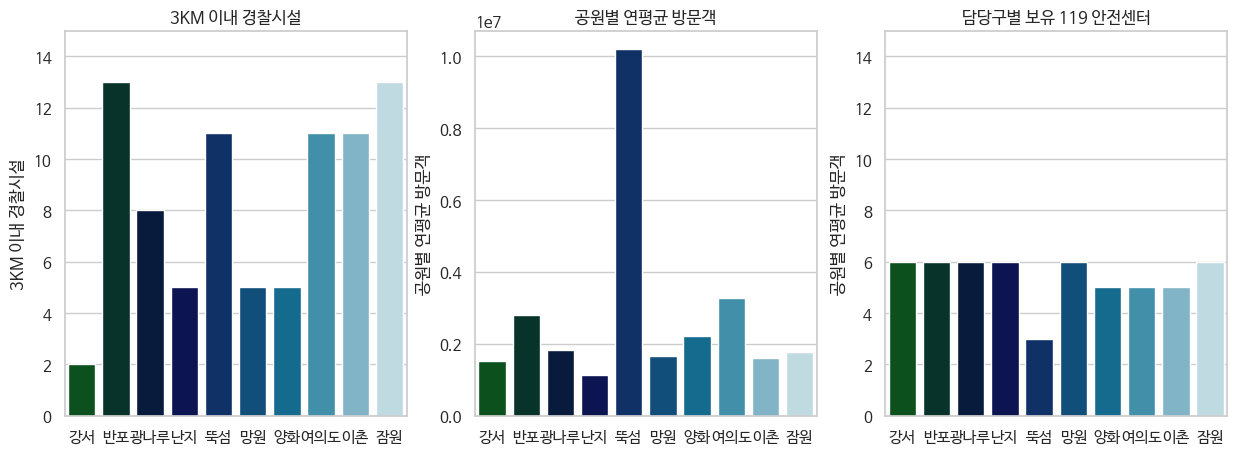

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize=(15,5))

sns.barplot(data = safe_df, x = '구분', y = '3km_경찰시설', palette='ocean', ax=ax[0]).set(ylim = (0,15), xlabel="", ylabel="3KM 이내 경찰시설")
sns.barplot(data = safe_df, x = '구분', y = '평균연별방문객', palette='ocean',ax=ax[1]).set(xlabel="", ylabel="공원별 연평균 방문객")
sns.barplot(data = safe_df, x = '구분', y = '119안전센터', palette='ocean',ax=ax[2]).set(ylim = (0,15), xlabel="", ylabel="공원별 연평균 방문객")

ax[0].set_title("3KM 이내 경찰시설")
ax[1].set_title("공원별 연평균 방문객")
ax[2].set_title("담당구별 보유 119 안전센터")

plt.show()

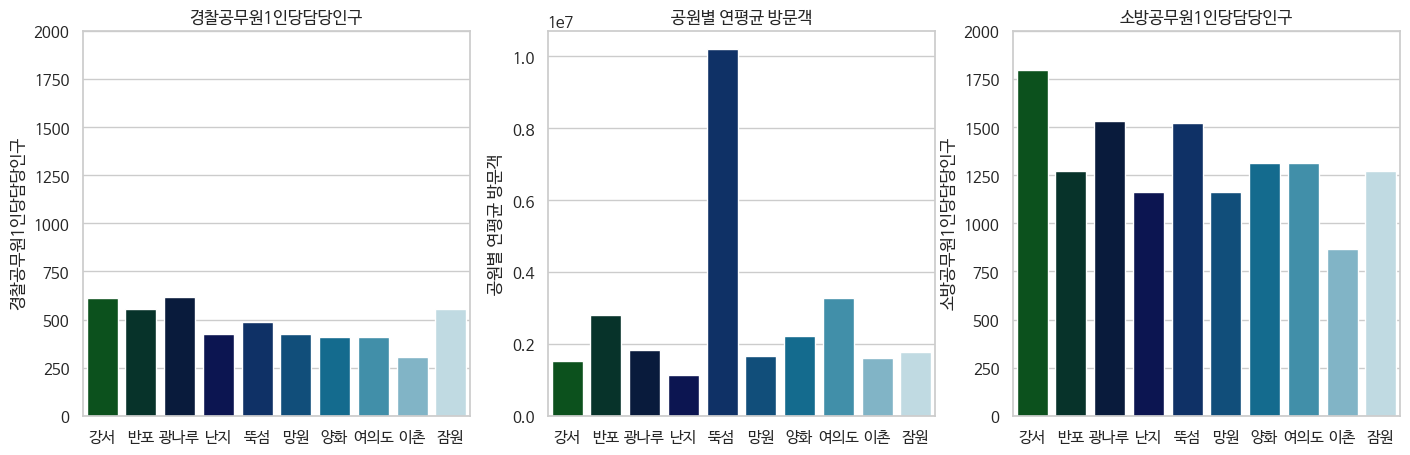

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize=(17,5))

sns.barplot(data = safe_df, x = '구분', y = '경찰공무원1인당담당인구', palette='ocean', ax=ax[0]).set(ylim = (0,2000), xlabel="", ylabel="경찰공무원1인당담당인구")
sns.barplot(data = safe_df, x = '구분', y = '평균연별방문객', palette='ocean',ax=ax[1]).set(xlabel="", ylabel="공원별 연평균 방문객")
sns.barplot(data = safe_df, x = '구분', y = '소방공무원1인당담당인구', palette='ocean',ax=ax[2]).set(ylim = (0,2000), xlabel="", ylabel="소방공무원1인당담당인구")

ax[0].set_title("경찰공무원1인당담당인구")
ax[1].set_title("공원별 연평균 방문객")
ax[2].set_title("소방공무원1인당담당인구")

plt.show()

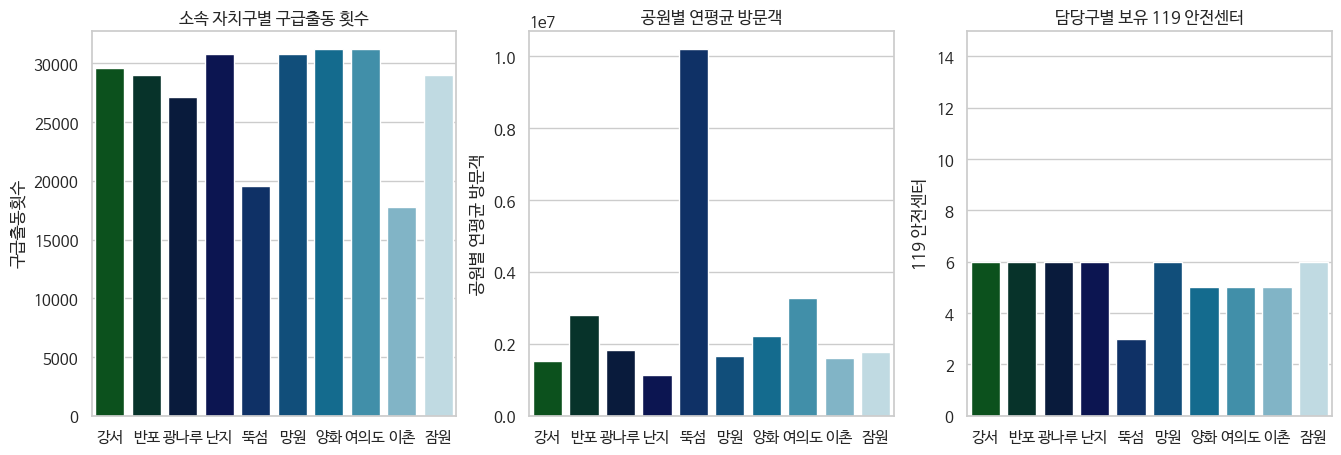

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize=(16,5))

sns.barplot(data = safe_df, x = '구분', y = '소속구구급출동횟수', palette='ocean', ax=ax[0]).set(xlabel="", ylabel="구급출동횟수")
sns.barplot(data = safe_df, x = '구분', y = '평균연별방문객', palette='ocean',ax=ax[1]).set(xlabel="", ylabel="공원별 연평균 방문객")
sns.barplot(data = safe_df, x = '구분', y = '119안전센터', palette='ocean',ax=ax[2]).set(ylim = (0,15), xlabel="", ylabel="119 안전센터")


ax[0].set_title("소속 자치구별 구급출동 횟수")
ax[1].set_title("공원별 연평균 방문객")
ax[2].set_title("담당구별 보유 119 안전센터")

plt.show()

# [7] 지하철 승하차 정보

- 출처 : https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do
- 원데이터
    - 서울시 지하철호선별 역별 승하차 인원 정보(23년 3월 ~ 23년 7월)
- 추가 참고 데이터
    - 일별역별시간대별승하차인원
    - 국가철도공단_코레일_지하철_주소데이터_20221122
    - 서울교통공사_지하철혼잡도정보_20221231
    - 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보


<br/>


- 설명 : 서울시 월별 역별 시간대별 승하차 인원 데이터
<br/>

- 전처리
    * 데이터 load 및 기본 전처리
    * 역별 값 처리
    * 각 한강공원별 최근접(9호선 제외) 지하철역 평균 승하차인원 추출
    * 엑셀로 최종 파일 생성 (한강공원_최인근_지하철역.csv)

<br/>

- 인사이트
    - 하차인원 > 승차인원 : 월드컵경기장역(난지공원), 신사역(잠원공원)여의공원역(여의공원), 망원역(망원공원), 당산역(양화공원)
    - 각 역별 얼마나 많은 사람이 사용하는지를 통해 공원별 지하철 접근성을 파악할 수 있음.
    - 단, 단순히 이 지표만으로 한강공원방문객들의 지하철 이용 비율을 유추하기는 어려움. 추후 연계 발전사항으로 '일별 지하철이용량'을 요일별, 일별, 특징 날짜별로 분석해본다면 유의미한 결과를 얻을 수 있을것


## 데이터 로드


In [ ]:
subway_2303 = pd.read_csv('path/python_colab_data/대중교통/CARD_SUBWAY_MONTH_202303.csv', encoding = 'utf-8')
subway_2304 = pd.read_csv('path/python_colab_data/대중교통/CARD_SUBWAY_MONTH_202304.csv', encoding = 'utf-8')
subway_2305 = pd.read_csv('path/python_colab_data/대중교통/CARD_SUBWAY_MONTH_202305.csv', encoding = 'utf-8')
subway_2306 = pd.read_csv('path/python_colab_data/대중교통/CARD_SUBWAY_MONTH_202306.csv', encoding = 'utf-8')
subway_2307 = pd.read_csv('path/python_colab_data/대중교통/CARD_SUBWAY_MONTH_202307.csv', encoding = 'utf-8')
subway_2303.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20230301,수인선,달월,62,61,20230304,NaN
20230301,수인선,사리,3237,2748,20230304,NaN
20230301,수인선,야목,230,196,20230304,NaN
20230301,수인선,어천,751,746,20230304,NaN
20230301,수인선,오목천,2169,1967,20230304,NaN


## 전처리

In [ ]:
subway_2303 = subway_2303.iloc[:,1:-2].rename(columns = {'역명' : '승차승객수', '승차총승객수' : '하차승객수'})
subway_2304 = subway_2304.iloc[:,1:-2].rename(columns = {'역명' : '승차승객수', '승차총승객수' : '하차승객수'})
subway_2305 = subway_2305.iloc[:,1:-2].rename(columns = {'역명' : '승차승객수', '승차총승객수' : '하차승객수'})
subway_2306 = subway_2306.iloc[:,1:-2].rename(columns = {'역명' : '승차승객수', '승차총승객수' : '하차승객수'})
subway_2307 = subway_2307.iloc[:,1:-2].rename(columns = {'역명' : '승차승객수', '승차총승객수' : '하차승객수'})

In [ ]:
# 23년 3월
# 방화역
bh2303_in = subway_2303[subway_2303['노선명'] == '방화'].sum()[1] # 방화 승차수
bh2303_out = subway_2303[subway_2303['노선명'] == '방화'].sum()[2] # 방화 승차수
# 고속버스터미널
gt2303_in = subway_2303[subway_2303['노선명'] == '고속터미널'].sum()[1]
gt2303_out = subway_2303[subway_2303['노선명'] == '고속터미널'].sum()[2]
# 암사
as2303_in = subway_2303[subway_2303['노선명'] == '암사'].sum()[1]
as2303_out = subway_2303[subway_2303['노선명'] == '암사'].sum()[2]
# 월드컵경기장
wc2303_in = subway_2303[subway_2303['노선명'] == '월드컵경기장(성산)'].sum()[1]
wc2303_out = subway_2303[subway_2303['노선명'] == '월드컵경기장(성산)'].sum()[2]
# 뚝섬유원지
dy2303_in = subway_2303[subway_2303['노선명'] == '뚝섬유원지'].sum()[1]
dy2303_out = subway_2303[subway_2303['노선명'] == '뚝섬유원지'].sum()[2]
# 망원
mw2303_in = subway_2303[subway_2303['노선명'] == '망원'].sum()[1]
mw2303_out = subway_2303[subway_2303['노선명'] == '망원'].sum()[2]
# 당산
ds2303_in = subway_2303[subway_2303['노선명'] == '당산'].sum()[1]
ds2303_out = subway_2303[subway_2303['노선명'] == '당산'].sum()[2]
# 여의나루
ye2303_in = subway_2303[subway_2303['노선명'] == '여의나루'].sum()[1]
ye2303_out = subway_2303[subway_2303['노선명'] == '여의나루'].sum()[2]
# 이촌
ic2303_in = subway_2303[subway_2303['노선명'] == '이촌(국립중앙박물관)'].sum()[1]
ic2303_out = subway_2303[subway_2303['노선명'] == '이촌(국립중앙박물관)'].sum()[2]
# 신사
ss2303_in = subway_2303[subway_2303['노선명'] == '신사'].sum()[1]
ss2303_out = subway_2303[subway_2303['노선명'] == '신사'].sum()[2]

In [ ]:
# 23년 4월
# 방화역
bh2304_in = subway_2304[subway_2304['노선명'] == '방화'].sum()[1] # 방화 승차수
bh2304_out = subway_2304[subway_2304['노선명'] == '방화'].sum()[2] # 방화 승차수
# 고속버스터미널
gt2304_in = subway_2304[subway_2304['노선명'] == '고속터미널'].sum()[1]
gt2304_out = subway_2304[subway_2304['노선명'] == '고속터미널'].sum()[2]
# 암사
as2304_in = subway_2304[subway_2304['노선명'] == '암사'].sum()[1]
as2304_out = subway_2304[subway_2304['노선명'] == '암사'].sum()[2]
# 월드컵경기장
wc2304_in = subway_2304[subway_2304['노선명'] == '월드컵경기장(성산)'].sum()[1]
wc2304_out = subway_2304[subway_2304['노선명'] == '월드컵경기장(성산)'].sum()[2]
# 뚝섬유원지
dy2304_in = subway_2304[subway_2304['노선명'] == '뚝섬유원지'].sum()[1]
dy2304_out = subway_2304[subway_2304['노선명'] == '뚝섬유원지'].sum()[2]
# 망원
mw2304_in = subway_2304[subway_2304['노선명'] == '망원'].sum()[1]
mw2304_out = subway_2304[subway_2304['노선명'] == '망원'].sum()[2]
# 당산
ds2304_in = subway_2304[subway_2304['노선명'] == '당산'].sum()[1]
ds2304_out = subway_2304[subway_2304['노선명'] == '당산'].sum()[2]
# 여의나루
ye2304_in = subway_2304[subway_2304['노선명'] == '여의나루'].sum()[1]
ye2304_out = subway_2304[subway_2304['노선명'] == '여의나루'].sum()[2]
# 이촌
ic2304_in = subway_2304[subway_2304['노선명'] == '이촌(국립중앙박물관)'].sum()[1]
ic2304_out = subway_2304[subway_2304['노선명'] == '이촌(국립중앙박물관)'].sum()[2]
# 신사
ss2304_in = subway_2304[subway_2304['노선명'] == '신사'].sum()[1]
ss2304_out = subway_2304[subway_2304['노선명'] == '신사'].sum()[2]

In [ ]:
# 23년 5월
# 방화역
bh2305_in = subway_2305[subway_2305['노선명'] == '방화'].sum()[1] # 방화 승차수
bh2305_out = subway_2305[subway_2305['노선명'] == '방화'].sum()[2] # 방화 승차수
# 고속버스터미널
gt2305_in = subway_2305[subway_2305['노선명'] == '고속터미널'].sum()[1]
gt2305_out = subway_2305[subway_2305['노선명'] == '고속터미널'].sum()[2]
# 암사
as2305_in = subway_2305[subway_2305['노선명'] == '암사'].sum()[1]
as2305_out = subway_2305[subway_2305['노선명'] == '암사'].sum()[2]
# 월드컵경기장
wc2305_in = subway_2305[subway_2305['노선명'] == '월드컵경기장(성산)'].sum()[1]
wc2305_out = subway_2305[subway_2305['노선명'] == '월드컵경기장(성산)'].sum()[2]
# 뚝섬유원지
dy2305_in = subway_2305[subway_2305['노선명'] == '뚝섬유원지'].sum()[1]
dy2305_out = subway_2305[subway_2305['노선명'] == '뚝섬유원지'].sum()[2]
# 망원
mw2305_in = subway_2305[subway_2305['노선명'] == '망원'].sum()[1]
mw2305_out = subway_2305[subway_2305['노선명'] == '망원'].sum()[2]
# 당산
ds2305_in = subway_2305[subway_2305['노선명'] == '당산'].sum()[1]
ds2305_out = subway_2305[subway_2305['노선명'] == '당산'].sum()[2]
# 여의나루
ye2305_in = subway_2305[subway_2305['노선명'] == '여의나루'].sum()[1]
ye2305_out = subway_2305[subway_2305['노선명'] == '여의나루'].sum()[2]
# 이촌
ic2305_in = subway_2305[subway_2305['노선명'] == '이촌(국립중앙박물관)'].sum()[1]
ic2305_out = subway_2305[subway_2305['노선명'] == '이촌(국립중앙박물관)'].sum()[2]
# 신사
ss2305_in = subway_2305[subway_2305['노선명'] == '신사'].sum()[1]
ss2305_out = subway_2305[subway_2305['노선명'] == '신사'].sum()[2]

In [ ]:
# 23년 6월
# 방화역
bh2306_in = subway_2306[subway_2306['노선명'] == '방화'].sum()[1] # 방화 승차수
bh2306_out = subway_2306[subway_2306['노선명'] == '방화'].sum()[2] # 방화 승차수
# 고속버스터미널
gt2306_in = subway_2306[subway_2306['노선명'] == '고속터미널'].sum()[1]
gt2306_out = subway_2306[subway_2306['노선명'] == '고속터미널'].sum()[2]
# 암사
as2306_in = subway_2306[subway_2306['노선명'] == '암사'].sum()[1]
as2306_out = subway_2306[subway_2306['노선명'] == '암사'].sum()[2]
# 월드컵경기장
wc2306_in = subway_2306[subway_2306['노선명'] == '월드컵경기장(성산)'].sum()[1]
wc2306_out = subway_2306[subway_2306['노선명'] == '월드컵경기장(성산)'].sum()[2]
# 뚝섬유원지
dy2306_in = subway_2306[subway_2306['노선명'] == '뚝섬유원지'].sum()[1]
dy2306_out = subway_2306[subway_2306['노선명'] == '뚝섬유원지'].sum()[2]
# 망원
mw2306_in = subway_2306[subway_2306['노선명'] == '망원'].sum()[1]
mw2306_out = subway_2306[subway_2306['노선명'] == '망원'].sum()[2]
# 당산
ds2306_in = subway_2306[subway_2306['노선명'] == '당산'].sum()[1]
ds2306_out = subway_2306[subway_2306['노선명'] == '당산'].sum()[2]
# 여의나루
ye2306_in = subway_2306[subway_2306['노선명'] == '여의나루'].sum()[1]
ye2306_out = subway_2306[subway_2306['노선명'] == '여의나루'].sum()[2]
# 이촌
ic2306_in = subway_2306[subway_2306['노선명'] == '이촌(국립중앙박물관)'].sum()[1]
ic2306_out = subway_2306[subway_2306['노선명'] == '이촌(국립중앙박물관)'].sum()[2]
# 신사
ss2306_in = subway_2306[subway_2306['노선명'] == '신사'].sum()[1]
ss2306_out = subway_2306[subway_2306['노선명'] == '신사'].sum()[2]

In [ ]:
# 23년 7월
# 방화역
bh2307_in = subway_2307[subway_2307['노선명'] == '방화'].sum()[1] # 방화 승차수
bh2307_out = subway_2307[subway_2307['노선명'] == '방화'].sum()[2] # 방화 승차수
# 고속버스터미널
gt2307_in = subway_2307[subway_2307['노선명'] == '고속터미널'].sum()[1]
gt2307_out = subway_2307[subway_2307['노선명'] == '고속터미널'].sum()[2]
# 암사
as2307_in = subway_2307[subway_2307['노선명'] == '암사'].sum()[1]
as2307_out = subway_2307[subway_2307['노선명'] == '암사'].sum()[2]
# 월드컵경기장
wc2307_in = subway_2307[subway_2307['노선명'] == '월드컵경기장(성산)'].sum()[1]
wc2307_out = subway_2307[subway_2307['노선명'] == '월드컵경기장(성산)'].sum()[2]
# 뚝섬유원지
dy2307_in = subway_2307[subway_2307['노선명'] == '뚝섬유원지'].sum()[1]
dy2307_out = subway_2307[subway_2307['노선명'] == '뚝섬유원지'].sum()[2]
# 망원
mw2307_in = subway_2307[subway_2307['노선명'] == '망원'].sum()[1]
mw2307_out = subway_2307[subway_2307['노선명'] == '망원'].sum()[2]
# 당산
ds2307_in = subway_2307[subway_2307['노선명'] == '당산'].sum()[1]
ds2307_out = subway_2307[subway_2307['노선명'] == '당산'].sum()[2]
# 여의나루
ye2307_in = subway_2307[subway_2307['노선명'] == '여의나루'].sum()[1]
ye2307_out = subway_2307[subway_2307['노선명'] == '여의나루'].sum()[2]
# 이촌
ic2307_in = subway_2307[subway_2307['노선명'] == '이촌(국립중앙박물관)'].sum()[1]
ic2307_out = subway_2307[subway_2307['노선명'] == '이촌(국립중앙박물관)'].sum()[2]
# 신사
ss2307_in = subway_2307[subway_2307['노선명'] == '신사'].sum()[1]
ss2307_out = subway_2307[subway_2307['노선명'] == '신사'].sum()[2]

In [ ]:
final_subway = pd.read_csv('/content/drive/MyDrive/ASAC/EDA프로젝트/DATA/대중교통/한강공원_최인근_지하철역.csv', encoding = 'cp949')

In [ ]:
a = final_subway.iloc[0:1,:]
b = final_subway.iloc[1:2,:]
c = final_subway.iloc[2:3,:]
d = final_subway.iloc[3:4,:]
e = final_subway.iloc[4:5,:]
f = final_subway.iloc[5:6,:]
g = final_subway.iloc[6:7,:]
h = final_subway.iloc[7:8,:]
i = final_subway.iloc[8:9,:]
j = final_subway.iloc[9:10,:]

In [ ]:
a = a.T.iloc[-3:-1,:].reset_index()
b = b.T.iloc[-3:-1,:].reset_index()
c = c.T.iloc[-3:-1,:].reset_index()
d = d.T.iloc[-3:-1,:].reset_index()
e = e.T.iloc[-3:-1,:].reset_index()
f = f.T.iloc[-3:-1,:].reset_index()
g = g.T.iloc[-3:-1,:].reset_index()
h = h.T.iloc[-3:-1,:].reset_index()
i = i.T.iloc[-3:-1,:].reset_index()
j = j.T.iloc[-3:-1,:].reset_index()
a

,index,0
0,월별평균승차객,201289
1,월별평균하차객,192190


## 시각화

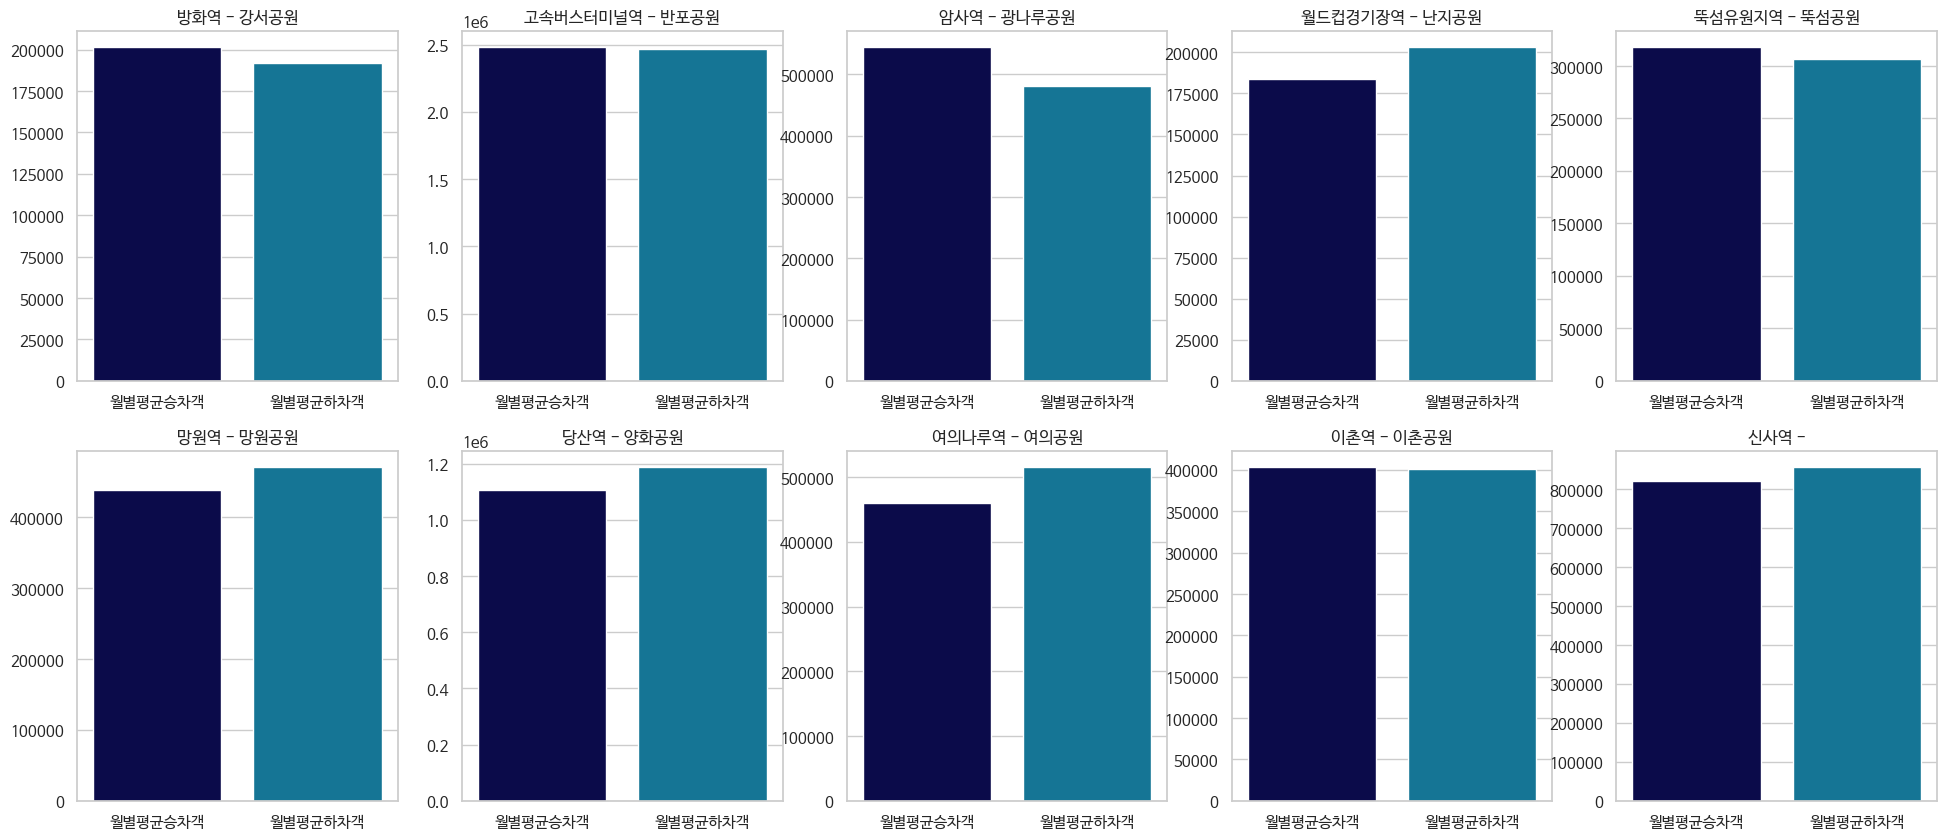

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize=(24,10))

sns.barplot(data = a, x = 'index', y = 0, palette='ocean', ax = ax[0,0]).set(xlabel="", ylabel="")
sns.barplot(data = b, x = 'index', y = 1, palette='ocean', ax = ax[0,1]).set(xlabel="", ylabel="")
sns.barplot(data = c, x = 'index', y = 2, palette='ocean', ax = ax[0,2]).set(xlabel="", ylabel="")
sns.barplot(data = d, x = 'index', y = 3, palette='ocean', ax = ax[0,3]).set(xlabel="", ylabel="")
sns.barplot(data = e, x = 'index', y = 4, palette='ocean', ax = ax[0,4]).set(xlabel="", ylabel="")

sns.barplot(data = f, x = 'index', y = 5, palette='ocean', ax = ax[1,0]).set(xlabel="", ylabel="")
sns.barplot(data = g, x = 'index', y = 6, palette='ocean', ax = ax[1,1]).set(xlabel="", ylabel="")
sns.barplot(data = h, x = 'index', y = 7, palette='ocean', ax = ax[1,2]).set(xlabel="", ylabel="")
sns.barplot(data = i, x = 'index', y = 8, palette='ocean', ax = ax[1,3]).set(xlabel="", ylabel="")
sns.barplot(data = j, x = 'index', y = 9, palette='ocean', ax = ax[1,4]).set(xlabel="", ylabel="")

ax[0, 0].set_title("방화역 - 강서공원")
ax[0, 1].set_title("고속버스터미널역 - 반포공원")
ax[0, 2].set_title("암사역 - 광나루공원")
ax[0, 3].set_title("월드컵경기장역 - 난지공원")
ax[0, 4].set_title("뚝섬유원지역 - 뚝섬공원")

ax[1, 0].set_title("망원역 - 망원공원")
ax[1, 1].set_title("당산역 - 양화공원")
ax[1, 2].set_title("여의나루역 - 여의공원")
ax[1, 3].set_title("이촌역 - 이촌공원")
ax[1, 4].set_title("신사역 - 잠원공원")

plt.show()

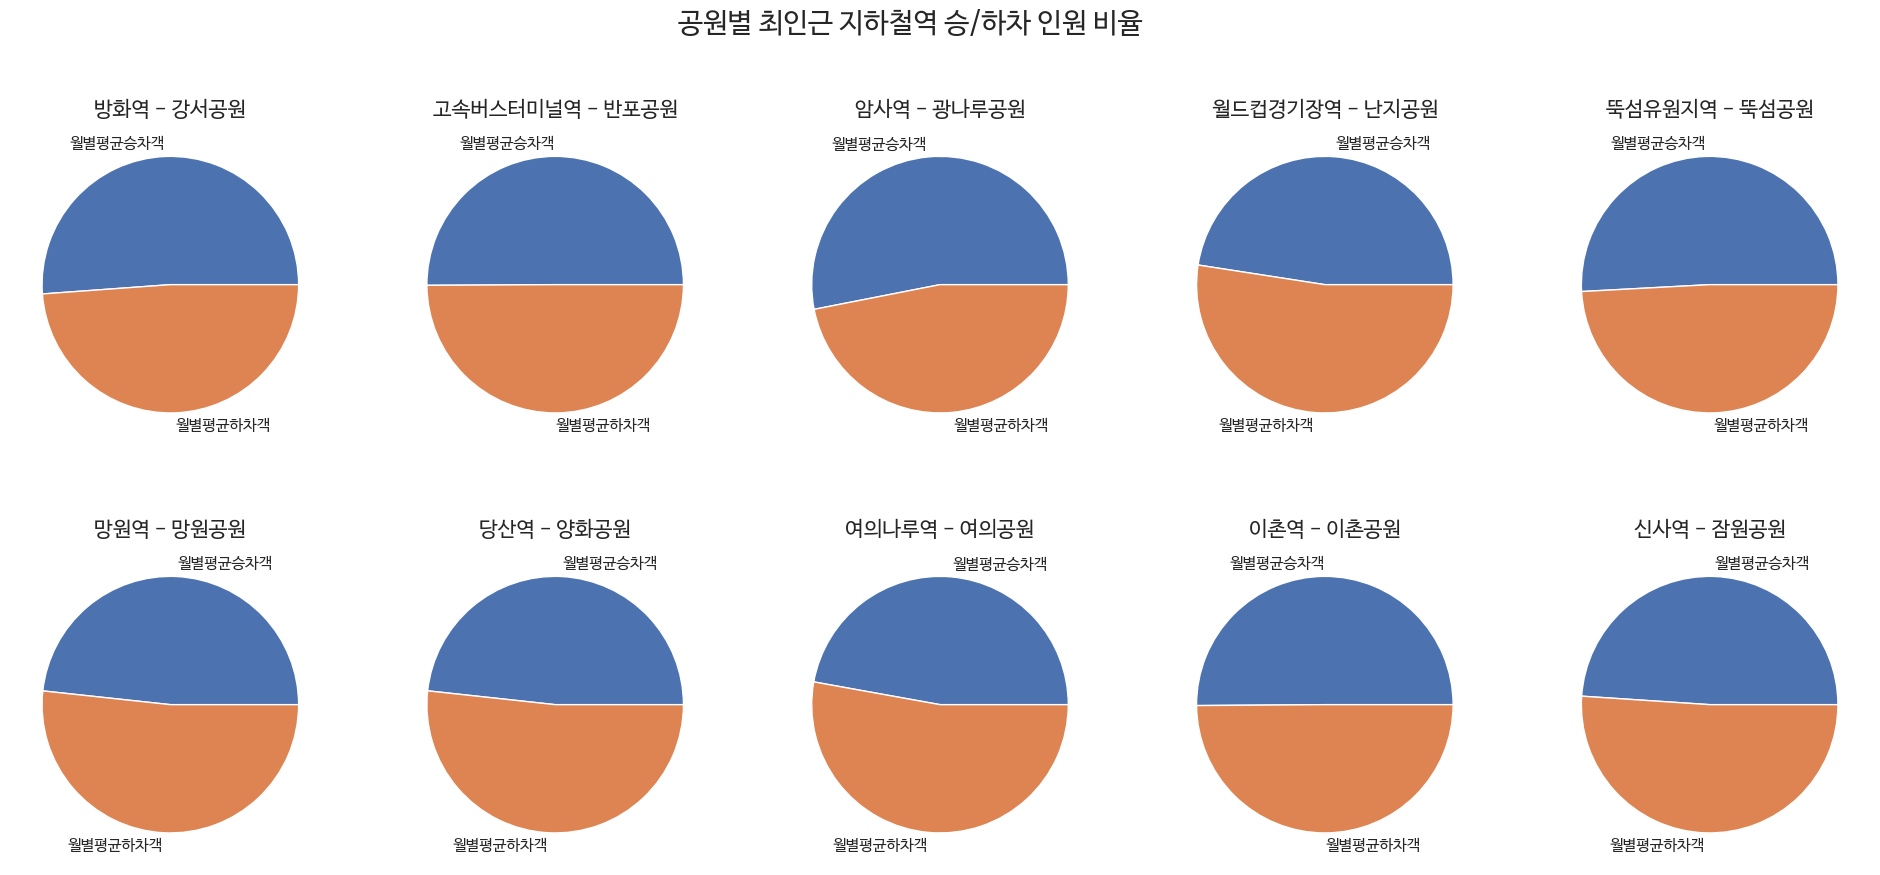

In [ ]:
#sns.barplot(data = a, x = 'index', y = 0, palette='ocean', ax = ax[0,0]).set(xlabel="", ylabel="")
z, axes = plt.subplots(2, 5)

z.set_size_inches((24, 10))

z.suptitle('공원별 최인근 지하철역 승/하차 인원 비율', fontsize = 20)

axes[0,0].pie(a[0], labels = a['index'])
axes[0,1].pie(b[1], labels = b['index'])
axes[0,2].pie(c[2], labels = c['index'])
axes[0,3].pie(d[3], labels = d['index'])
axes[0,4].pie(e[4], labels = e['index'])
axes[1,0].pie(f[5], labels = f['index'])
axes[1,1].pie(g[6], labels = g['index'])
axes[1,2].pie(h[7], labels = h['index'])
axes[1,3].pie(i[8], labels = i['index'])
axes[1,4].pie(j[9], labels = j['index'])

axes[0, 0].set_title("방화역 - 강서공원", fontsize = 15)
axes[0, 1].set_title("고속버스터미널역 - 반포공원", fontsize = 15)
axes[0, 2].set_title("암사역 - 광나루공원", fontsize = 15)
axes[0, 3].set_title("월드컵경기장역 - 난지공원", fontsize = 15)
axes[0, 4].set_title("뚝섬유원지역 - 뚝섬공원", fontsize = 15)
axes[1, 0].set_title("망원역 - 망원공원", fontsize = 15)
axes[1, 1].set_title("당산역 - 양화공원", fontsize = 15)
axes[1, 2].set_title("여의나루역 - 여의공원", fontsize = 15)
axes[1, 3].set_title("이촌역 - 이촌공원", fontsize = 15)
axes[1, 4].set_title("신사역 - 잠원공원", fontsize = 15)

plt.show()

# [8] 한강공원별 최인접 지하철역과 거리 (KM)

- 네이버맵 검색 기준 각 한강공원에서 최인접 지하철역까지의 거리 산출 및 시각화
- [6] 치안데이터인 'safe_df' 내부에 입력해둔 값 활용하여 별도 전처리 불필요

## 시각화

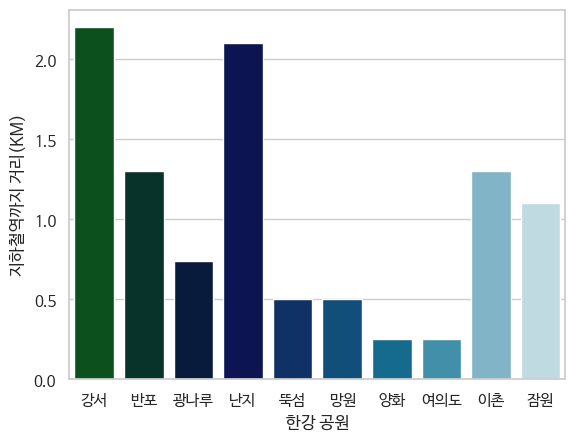

In [ ]:
sns.barplot(data = safe_df, x = '구분', y = '거리(sub_KM)', palette='ocean').set(xlabel="한강 공원", ylabel="지하철역까지 거리(KM)")

plt.show()

# [9] 공원별 총 방문 인원 전처리

- 위에서 각 공원별로 제작한 tmp 데이터프레임을 활용하여 태블로 분석용 데이터프레임 생성

In [ ]:
banpo_tmp['구분'] = '반포'
gangseo_tmp['구분'] = '강서'
gwang_tmp['구분'] = '광나루'
nanji_tmp['구분'] = '난지'
ddoog_tmp['구분'] = '뚝섬'
mangwon_tmp['구분'] = '망원'
yanghwa_tmp['구분'] = '양화'
ichon_tmp['구분'] = '이촌'
jamwon_tmp['구분'] = '잠원'
yeoui_tmp['구분'] = '여의도'

In [ ]:
banpo_tmp['일반이용자총합'] = banpo_tmp['일반이용자(아침)'] + banpo_tmp['일반이용자(낮)'] + banpo_tmp['일반이용자(저녁)']
banpo_tmp['이용자총합'] = banpo_tmp['일반이용자(아침)'] + banpo_tmp['일반이용자(낮)'] + banpo_tmp['일반이용자(저녁)'] + banpo_tmp['운동시설']
banpo_tmp_sum = banpo_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
gangseo_tmp['일반이용자총합'] = gangseo_tmp['일반이용자(아침)'] + gangseo_tmp['일반이용자(낮)'] + gangseo_tmp['일반이용자(저녁)']
gangseo_tmp['이용자총합'] = gangseo_tmp['일반이용자(아침)'] + gangseo_tmp['일반이용자(낮)'] + gangseo_tmp['일반이용자(저녁)'] + gangseo_tmp['운동시설']
gangseo_tmp_sum = gangseo_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
gwang_tmp['일반이용자총합'] = gwang_tmp['일반이용자(아침)'] + gwang_tmp['일반이용자(낮)'] + gwang_tmp['일반이용자(저녁)']
gwang_tmp['이용자총합'] = gwang_tmp['일반이용자(아침)'] + gwang_tmp['일반이용자(낮)'] + gwang_tmp['일반이용자(저녁)'] + gwang_tmp['운동시설']
gwang_tmp_sum = gwang_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
nanji_tmp['일반이용자총합'] = nanji_tmp['일반이용자(아침)'] + nanji_tmp['일반이용자(낮)'] + nanji_tmp['일반이용자(저녁)']
nanji_tmp['이용자총합'] = nanji_tmp['일반이용자(아침)'] + nanji_tmp['일반이용자(낮)'] + nanji_tmp['일반이용자(저녁)'] + nanji_tmp['운동시설']
nanji_tmp_sum = nanji_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
ddoog_tmp['일반이용자총합'] = ddoog_tmp['일반이용자(아침)'] + ddoog_tmp['일반이용자(낮)'] + ddoog_tmp['일반이용자(저녁)']
ddoog_tmp['이용자총합'] = ddoog_tmp['일반이용자(아침)'] + ddoog_tmp['일반이용자(낮)'] + ddoog_tmp['일반이용자(저녁)'] + ddoog_tmp['운동시설']
ddoog_tmp_sum = ddoog_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
mangwon_tmp['일반이용자총합'] = mangwon_tmp['일반이용자(아침)'] + mangwon_tmp['일반이용자(낮)'] + mangwon_tmp['일반이용자(저녁)']
mangwon_tmp['이용자총합'] = mangwon_tmp['일반이용자(아침)'] + mangwon_tmp['일반이용자(낮)'] + mangwon_tmp['일반이용자(저녁)'] + mangwon_tmp['운동시설']
mangwon_tmp_sum = mangwon_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
yanghwa_tmp['일반이용자총합'] = yanghwa_tmp['일반이용자(아침)'] + yanghwa_tmp['일반이용자(낮)'] + yanghwa_tmp['일반이용자(저녁)']
yanghwa_tmp['이용자총합'] = yanghwa_tmp['일반이용자(아침)'] + yanghwa_tmp['일반이용자(낮)'] + yanghwa_tmp['일반이용자(저녁)'] + yanghwa_tmp['운동시설']
yanghwa_tmp_sum = yanghwa_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
ichon_tmp['일반이용자총합'] = ichon_tmp['일반이용자(아침)'] + ichon_tmp['일반이용자(낮)'] + ichon_tmp['일반이용자(저녁)']
ichon_tmp['이용자총합'] = ichon_tmp['일반이용자(아침)'] + ichon_tmp['일반이용자(낮)'] + ichon_tmp['일반이용자(저녁)'] + ichon_tmp['운동시설']
ichon_tmp_sum = ichon_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
jamwon_tmp['일반이용자총합'] = jamwon_tmp['일반이용자(아침)'] + jamwon_tmp['일반이용자(낮)'] + jamwon_tmp['일반이용자(저녁)']
jamwon_tmp['이용자총합'] = jamwon_tmp['일반이용자(아침)'] + jamwon_tmp['일반이용자(낮)'] + jamwon_tmp['일반이용자(저녁)'] + jamwon_tmp['운동시설']
jamwon_tmp_sum = jamwon_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
yeoui_tmp['일반이용자총합'] = yeoui_tmp['일반이용자(아침)'] + yeoui_tmp['일반이용자(낮)'] + yeoui_tmp['일반이용자(저녁)']
yeoui_tmp['이용자총합'] = yeoui_tmp['일반이용자(아침)'] + yeoui_tmp['일반이용자(낮)'] + yeoui_tmp['일반이용자(저녁)'] + yeoui_tmp['운동시설']
yeoui_tmp_sum = yeoui_tmp[['구분', '운동시설','일반이용자총합','이용자총합']]

In [ ]:
tmp_concat_park_sum = pd.concat([banpo_tmp_sum, gangseo_tmp_sum,gwang_tmp_sum,nanji_tmp_sum,ddoog_tmp_sum,mangwon_tmp_sum,yanghwa_tmp_sum,ichon_tmp_sum,jamwon_tmp_sum,yeoui_tmp_sum], axis = 0)
tmp_concat_park_sum

,구분,운동시설,일반이용자총합,이용자총합
20190101,반포,1008.926407,6158.000000,7166.926407
20190102,반포,1026.341991,3119.264069,4145.606061
20190103,반포,1094.386957,11007.865217,12102.252174
20190104,반포,2247.000000,10304.000000,12551.000000
20190105,반포,972.000000,5662.000000,6634.000000
...,...,...,...,...
20230527,여의도,908.930435,12343.582609,13252.513043
20230528,여의도,956.882609,9164.991304,10121.873913
20230529,여의도,615.865217,3862.839130,4478.704348
20230530,여의도,643.987013,3931.415584,4575.402597


In [ ]:
tmp_concat_park_sum.to_excel('path/python_colab_data/방문객/전처리후/tmp_concat_park_sum.xlsx')